In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('darkgrid')

# Покдлючаем полезные библиотеки

In [2]:
df = pd.read_csv('HW1_var_20.csv',sep=';')
df.head(10)

# Смотрим правильно ли все импортировалось

,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,20,1000020,2НДФЛ,Ремонт,1,0.35,женский,1,0,второе высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,1000040,2НДФЛ,Ремонт,1,0.49,мужской,0,0,среднее-специальное,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20,1000060,2НДФЛ,Ремонт,0,0.32,мужской,0,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,1000080,Поступление зарплаты на счет,Ремонт,1,0.59,женский,1,0,Высшее/Второе высшее/Ученая степень,...,0.0,5.0,72.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,20,1000100,2НДФЛ,Ремонт,1,0.58,женский,0,0,высшее,...,0.0,1.0,89.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,20,1000120,Форма банка (без печати работодателя),Покупка мебели,0,0.58,женский,0,0,второе высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20,1000140,Поступление зарплаты на счет,Другое,0,0.44,женский,0,0,второе высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20,1000160,Поступление зарплаты на счет,Покупка бытовой техники,1,0.16,женский,0,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20,1000180,Форма банка (без печати работодателя),Ремонт,1,0.18,женский,0,0,среднее-специальное,...,2.0,4.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,20,1000200,Поступление зарплаты на счет,Другое,0,0.59,женский,0,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
del df['Номер варианта'] # удаляем номер варианта

In [4]:
df.dtypes # Смотрим правильно ли определились типы признаков

ID                         int64
INCOME_BASE_TYPE          object
CREDIT_PURPOSE            object
INSURANCE_FLAG             int64
DTI                       object
SEX                       object
FULL_AGE_CHILD_NUMBER      int64
DEPENDANT_NUMBER           int64
EDUCATION                 object
EMPL_TYPE                 object
EMPL_SIZE                 object
BANKACCOUNT_FLAG         float64
Period_at_work           float64
age                      float64
EMPL_PROPERTY             object
EMPL_FORM                 object
FAMILY_STATUS             object
max90days                float64
max60days                float64
max30days                float64
max21days                float64
max14days                float64
avg_num_delay            float64
if_zalog                 float64
num_AccountActive180     float64
num_AccountActive90      float64
num_AccountActive60      float64
Active_to_All_prc        float64
numAccountActiveAll      float64
numAccountClosed         float64
sum_of_pay

Вероятнее всего DTI содержит ошибочное поле, т.к. pandas распознал его как оobject, а должен был как float

In [5]:
import traceback

In [6]:
try:
    df['DTI'] = df.DTI.astype(float)
except Exception as e:
    print('Ошибка:\n', traceback.format_exc())

Ошибка:
 Traceback (most recent call last):
  File "<ipython-input-6-674cb588ec94>", line 2, in <module>
    df['DTI'] = df.DTI.astype(float)
  File "/home/paul/.local/lib/python3.8/site-packages/pandas/core/generic.py", line 5548, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors,)
  File "/home/paul/.local/lib/python3.8/site-packages/pandas/core/internals/managers.py", line 604, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/home/paul/.local/lib/python3.8/site-packages/pandas/core/internals/managers.py", line 409, in apply
    applied = getattr(b, f)(**kwargs)
  File "/home/paul/.local/lib/python3.8/site-packages/pandas/core/internals/blocks.py", line 595, in astype
    values = astype_nansafe(vals1d, dtype, copy=True)
  File "/home/paul/.local/lib/python3.8/site-packages/pandas/core/dtypes/cast.py", line 997, in astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float

Как видим к нам похоже пришла ошибка из экселя, удалим ее:

In [7]:
df.shape

(10242, 43)

In [8]:
df = df.loc[df['DTI'] != '#ПОЛЕ!', ]

In [9]:
try:
    df['DTI'] = df.DTI.astype(float)
except Exception as e:
    print('Ошибка:\n', traceback.format_exc())

In [10]:
df.shape

(10241, 43)

Заработало!

# Часть 1

Рассчитываем кол-во уникальных значений, нулевых и пустых значений + доля в % от общего кол-ва

In [11]:
info_table = pd.DataFrame()
info_table['Column'] = df.columns

In [12]:
info_table['unique_count'] = df.nunique().values
info_table['unique_percent'] = np.round(df.nunique().values / df.shape[0] * 100, 3)

In [13]:
def find_zeros(data):
    return data.shape[0] - np.count_nonzero(data)
sup = df.apply(find_zeros).values
info_table['zero_count'] = sup
info_table['zero_percent'] = np.round(sup / df.shape[0] * 100, 3)

In [14]:
info_table['nan_count'] = df.isnull().sum().values
info_table['nan_percent'] = np.round(df.isnull().sum().values / df.shape[0] * 100, 3)

In [15]:
info_table

,Column,unique_count,unique_percent,zero_count,zero_percent,nan_count,nan_percent
0,ID,10241,100.000,0,0.000,0,0.000
1,INCOME_BASE_TYPE,4,0.039,0,0.000,63,0.615
2,CREDIT_PURPOSE,10,0.098,0,0.000,0,0.000
3,INSURANCE_FLAG,2,0.020,3957,38.639,0,0.000
4,DTI,58,0.566,0,0.000,109,1.064
5,SEX,2,0.020,0,0.000,0,0.000
6,FULL_AGE_CHILD_NUMBER,8,0.078,6000,58.588,0,0.000
7,DEPENDANT_NUMBER,4,0.039,10194,99.541,0,0.000
8,EDUCATION,9,0.088,0,0.000,0,0.000
9,EMPL_TYPE,9,0.088,0,0.000,11,0.107


Среднее значение, медиана, стандартное отклонение,минимум,максимум,тип данных по каждому показателю в предоставленных данных

Конечно же вручную все это будет долго считать, поэтому попросим pandas сделать это за нас:

In [16]:
df.drop(columns=['ID']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INSURANCE_FLAG,10241.0,0.613612,0.486945,0.00,0.00,1.000000,1.000000,1.000000
DTI,10132.0,0.387776,0.136740,0.01,0.28,0.400000,0.490000,0.590000
FULL_AGE_CHILD_NUMBER,10241.0,0.570843,0.782178,0.00,0.00,0.000000,1.000000,8.000000
DEPENDANT_NUMBER,10241.0,0.005859,0.093567,0.00,0.00,0.000000,0.000000,3.000000
BANKACCOUNT_FLAG,7963.0,0.375235,0.853410,0.00,0.00,0.000000,0.000000,4.000000
Period_at_work,7962.0,66.303065,66.555459,3.00,20.00,44.000000,89.000000,518.000000
age,7963.0,36.438905,8.657099,23.00,29.00,35.000000,43.000000,63.000000
max90days,3876.0,1.614293,1.989804,0.00,0.00,1.000000,2.000000,29.000000
max60days,3876.0,1.158669,1.624126,0.00,0.00,1.000000,2.000000,24.000000
max30days,3876.0,0.858875,1.342872,0.00,0.00,0.000000,1.000000,15.000000


In [17]:
df.FULL_AGE_CHILD_NUMBER.unique()

array([1, 0, 2, 3, 8, 4, 5, 6])

Какие выводы можно сделать исходя из этих двух таблиц?  

1) Для признаков с номерами 10-42 у нас нашлось слишком много строк с пропусками, удалить их мы не можем  т.к. потеряем значительную часть датасета, поэтому для всех них введем константу -42, которая будет означать пропуск, за счет отрицательности и большого модуля она будет выделсятся на фоне остальных данных.  Для остальных же признаков удалим строки с nan

2) Как видим min_MnthAfterLoan имеет значение -1, из описания признаков не понятно, что означает данное значение, поэтому этот признак мы уберем  

3) FULL_AGE_CHILD_NUMBER лучше сделать категориальным т.к. очень много нулевых значений, что может означать отсутсвие ребенка (что может являтся важным показателем)  

Рассмотрим расспределение признаков с типом float:

In [18]:
df.drop(columns=['ID'], inplace=True)
del df['min_MnthAfterLoan']

for_graph=df.dropna()

to_replace = info_table[info_table.nan_count > 2000].Column.values
to_replace = to_replace[to_replace!='min_MnthAfterLoan']
df[to_replace] = df[to_replace].fillna(-42, inplace=False)

df.dropna(inplace=True)

df.isnull().sum()

INCOME_BASE_TYPE         0
CREDIT_PURPOSE           0
INSURANCE_FLAG           0
DTI                      0
SEX                      0
FULL_AGE_CHILD_NUMBER    0
DEPENDANT_NUMBER         0
EDUCATION                0
EMPL_TYPE                0
EMPL_SIZE                0
BANKACCOUNT_FLAG         0
Period_at_work           0
age                      0
EMPL_PROPERTY            0
EMPL_FORM                0
FAMILY_STATUS            0
max90days                0
max60days                0
max30days                0
max21days                0
max14days                0
avg_num_delay            0
if_zalog                 0
num_AccountActive180     0
num_AccountActive90      0
num_AccountActive60      0
Active_to_All_prc        0
numAccountActiveAll      0
numAccountClosed         0
sum_of_paym_months       0
all_credits              0
Active_not_cc            0
own_closed               0
max_MnthAfterLoan        0
dlq_exist                0
thirty_in_a_year         0
sixty_in_a_year          0
n

Для начала посмотрим на данные без пропусков:

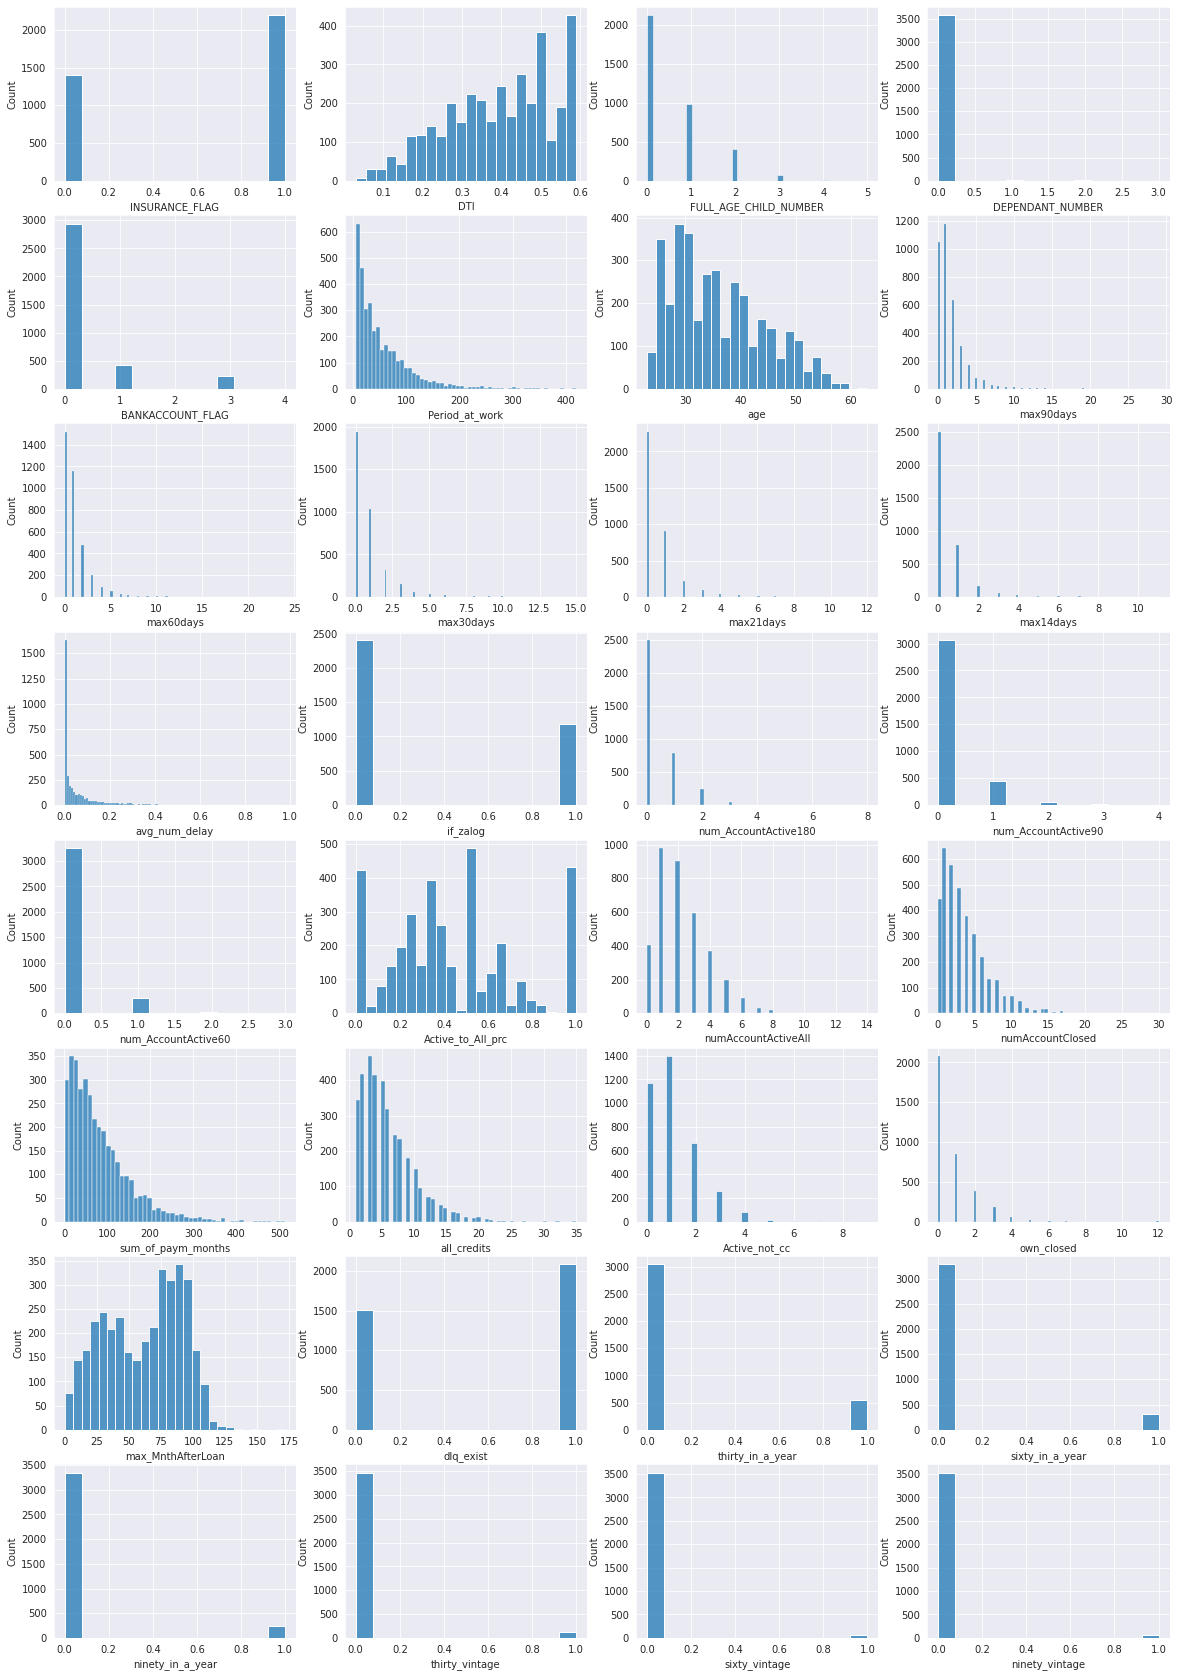

In [19]:
names = df.dtypes[df.dtypes != object].index
size = names.shape[0]
names = names.tolist()
f, axes = plt.subplots(round(size / 4), 4,figsize=(20,30))
for i, feature in enumerate(names):
    sns.histplot(for_graph, x=feature, ax=axes[i // 4, i % 4])

Теперь на всякий случай посмотрим с пропусками:

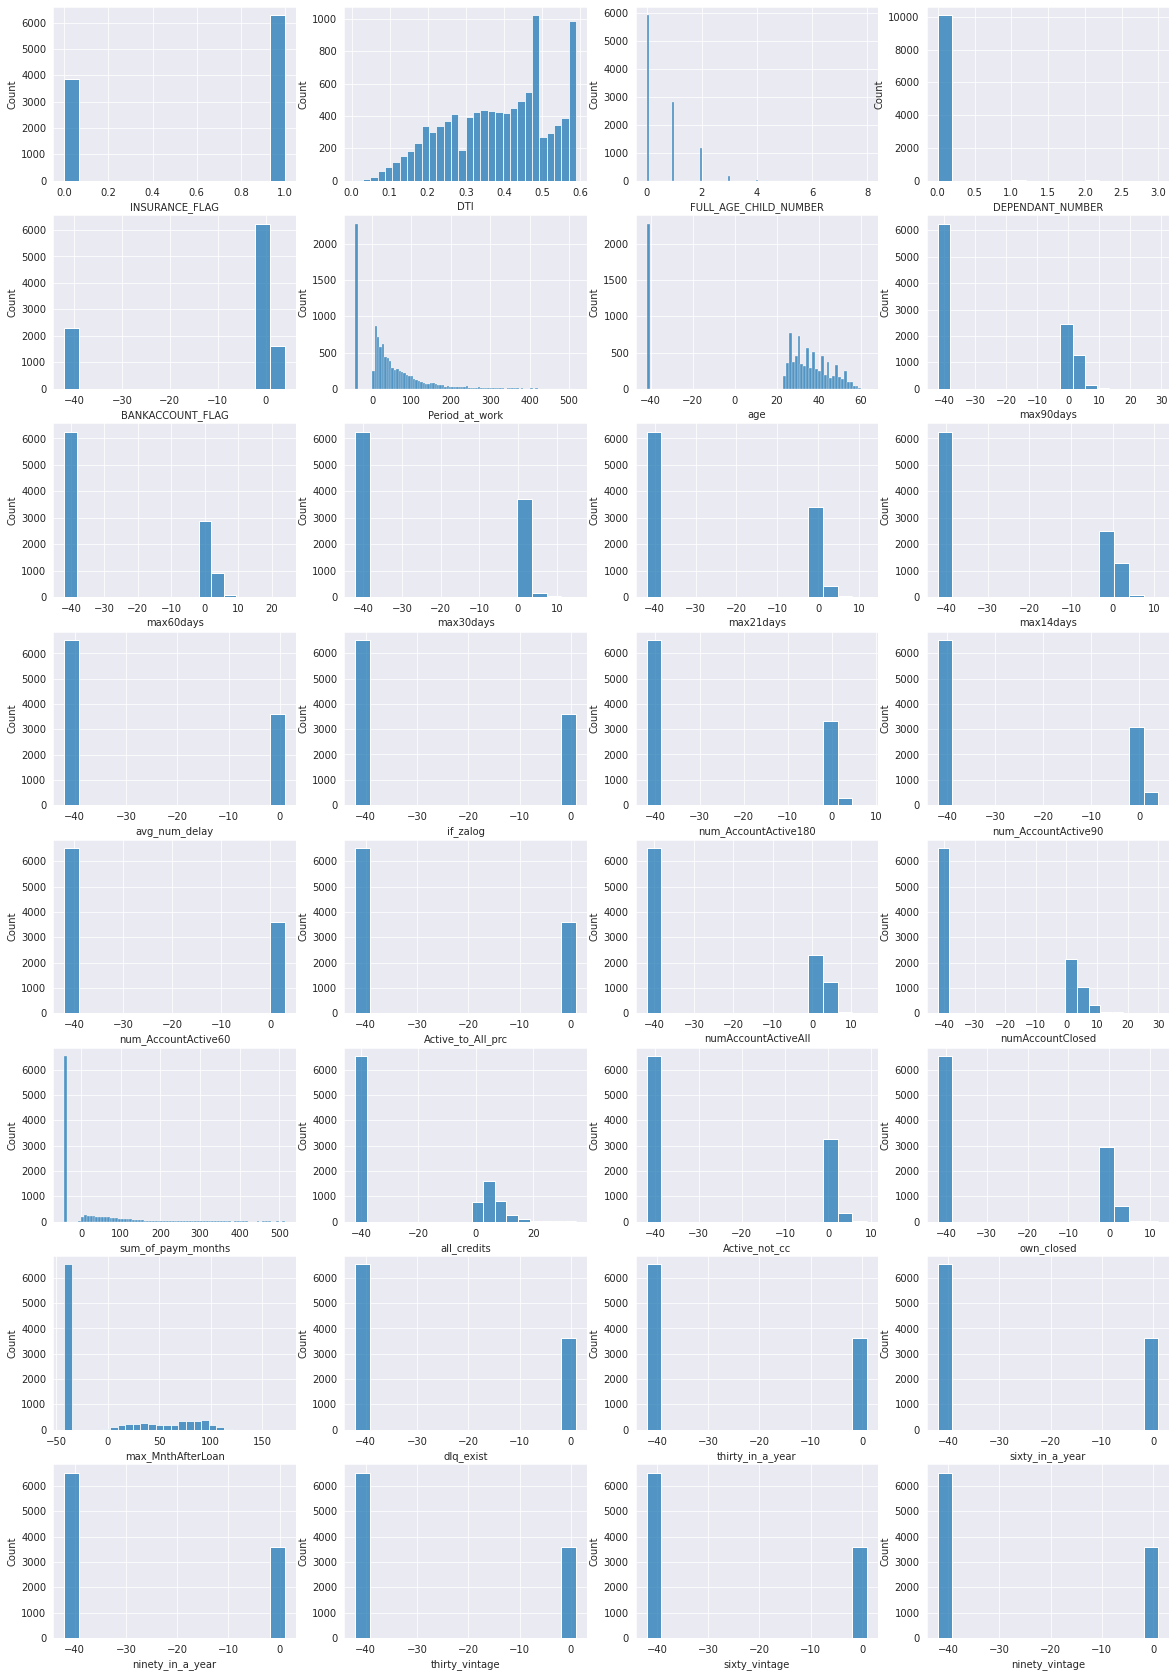

In [20]:
names = df.dtypes[df.dtypes != object].index
size = names.shape[0]
names = names.tolist()
f, axes = plt.subplots(round(size / 4), 4,figsize=(20,30))
for i, feature in enumerate(names):
    sns.histplot(df, x=feature, ax=axes[i // 4, i % 4])

Также посмотрим на корреляции (без пропусков):
    

Text(0.5, 1.0, 'Корреляция числовых признаков')

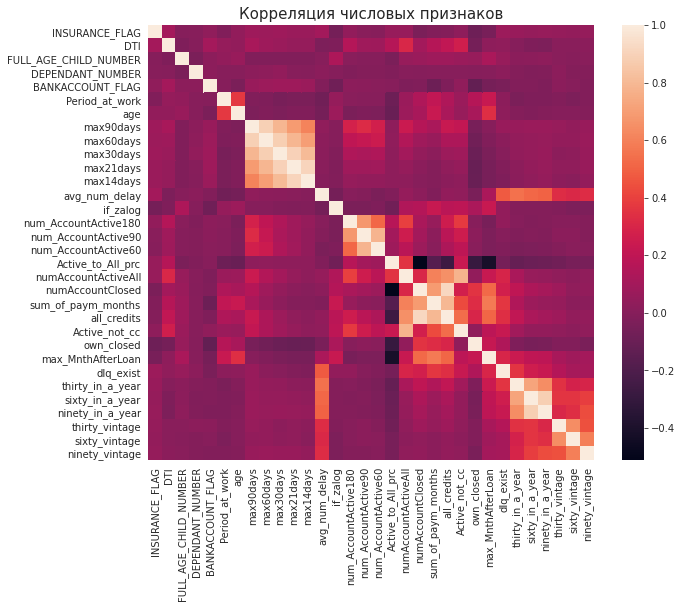

In [21]:
names = df.dtypes[df.dtypes != object].index
size = names.shape[0]
names = names.tolist()
corr = for_graph[names].corr()

# plot the heatmap
plot = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plot.figure.set_size_inches(10, 8)
plot.set_title('Корреляция числовых признаков', size=15)

Видим, что корреляция маленькая, что значит что линейные методы нам не подойдут

Рассмотрим распределение признаков с типом object (тут уже с пропусками т.к. это отдельная категория):

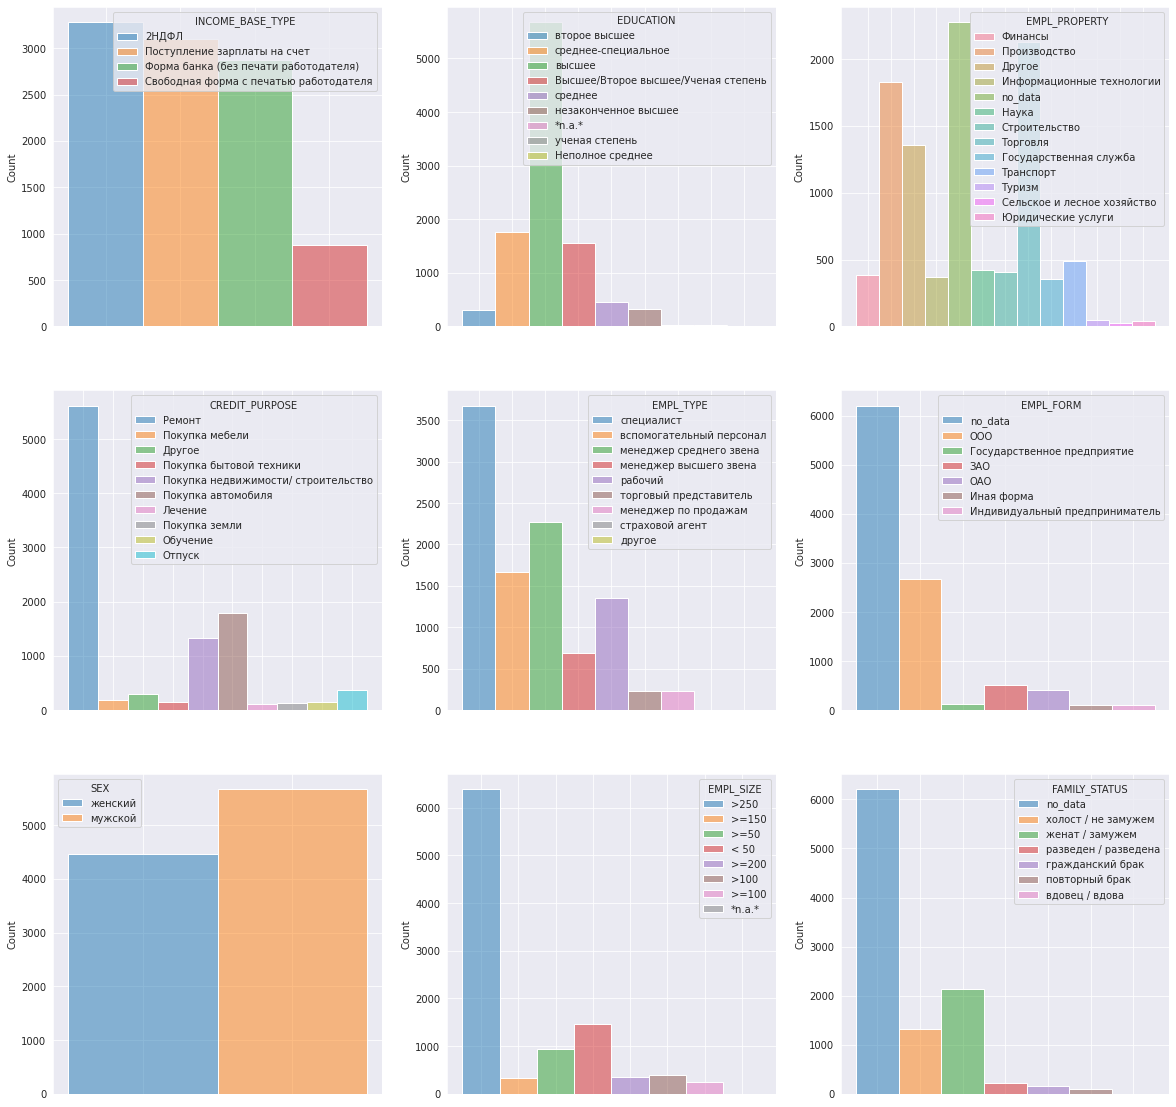

In [22]:
names = df.dtypes[df.dtypes == object].index
size = names.shape[0]
names = names.tolist()
f, axes = plt.subplots(round(size / 3), 3,figsize=(20,20))
#plt.xticks(rotation=80)
for i, feature in enumerate(names):
    axes[i % 3, i // 3].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
    sns.histplot(df.replace(-42, 'no_data'), x=feature, hue=feature, ax=axes[i % 3, i // 3])

Пришло время выделить категориальные и числовые признаки, а также отобрать важные для нас признаки:

Сначала посмотрим на файл описания признаков и выберем наиболее интересные на наш взгляд:

Я решил выбрать такие признаки:  

INCOME_BASE_TYPE(a.k.a. Подтверждение дохода),  
CREDIT_PURPOSE (a.k.a. цель получения кредита),  
INSURANCE_FLAG(a.k.a. Страхование заемщика при получении кредита),  
DTI	(a.k.adebt-to-income ratio отношение долга к доходам),  
SEX (a.k.a пол),  
FAMILY_STATUS, 
FULL_AGE_CHILD_NUMBER (a.k.a количество лет ребенку),  
DEPENDANT_NUMBER (a.k.a. кол-во иждевенцев),  
EDUCATION (a.k.a образование),  
EMPL_TYPE (a.k.a должность),  
EMPL_SIZE(a.k.a. зарплата),  
BANKACCOUNT_FLAG(кол-во аккаунтов у клиента),  
Period_at_work(a.k.a. время работы),  
age(a.k.a. возраст),  
EMPL_PROPERTY(a.k.a. сфера бизнеса работадателя,  
EMPL_FORM(a.k.a. правовая форма),  
avg_num_delay(a.k.a. среднее кол-во задержки олпаты),  
if_zalog(a.k.a. наличие залога),    
Active_to_All_prc(a.k.a. отношение активных счетов ко всем счетам),  
numAccountActiveAll(a.k.a. кол-во открытых счетов),  
numAccountClosed(a.k.a.кол-во закрытых счетов),  
sum_of_paym_months(a.k.a. сумма платежей за последний месяц),  
all_credits(a.k.a. кол-во кредитов),  
Active_not_cc(a.k.a. активные кредитные счета),  
own_closed(a.k.a. кол-во закрытых кредитов),  
max_MnthAfterLoan (a.k.a. кол-во месяцев прошеднее с момента выдачи первого кредита),  
dlq_exist(a.k.a. наличие просрочки на данный момент)

Категориальные:  
1) INCOME_BASE_TYPE  
2) CREDIT_PURPOSE  
3) SEX  
4) FULL_AGE_CHILD_NUMBER (причиной для выбора данного признака как категориального послужило большое число строк со значением данного признака 0, т.е. мы будем считать данный признак показателем наличия ребенка)  
5) BANKACCOUNT_FLAG    
6) EMPL_PROPERTY    
7) INSURANCE_FLAG (уже ohe)  
8) EDUCATION  
9) EMPL_TYPE  
10) EMPL_SIZE  
11) EMPL_FORM  
12) if_zalog  
13) dlq_exist

Оставшиеся признаки считаем числовыми

In [23]:
to_use = np.array(['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'INSURANCE_FLAG', 'DTI', 'SEX', 'FULL_AGE_CHILD_NUMBER',
          'DEPENDANT_NUMBER', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'BANKACCOUNT_FLAG', 'Period_at_work',
         'age', 'EMPL_PROPERTY', 'EMPL_FORM', 'avg_num_delay', 'if_zalog', 'Active_to_All_prc', 
         'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months', 'all_credits', 'Active_not_cc',
         'own_closed', 'max_MnthAfterLoan', 'dlq_exist', 'FAMILY_STATUS'])
categorical = np.array(['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'SEX', 'FULL_AGE_CHILD_NUMBER', 'BANKACCOUNT_FLAG', 'EMPL_PROPERTY',
              'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'EMPL_FORM', 'if_zalog', 'dlq_exist', 'FAMILY_STATUS', 'INSURANCE_FLAG'])
numeric = np.setdiff1d(to_use, categorical)

df = df[to_use]

Теперь посмотрим есть ли люди ну с очень болшим числов пропусков:

In [24]:
for i in range(to_use.shape[0]):
    sup = np.count_nonzero(np.count_nonzero(df.values == -42, axis = 1) > i)
    if sup == 0:
        break
    print("Число людей с {} пропусками в данных: ".format(i), sup)

Число людей с 0 пропусками в данных:  6537
Число людей с 1 пропусками в данных:  6524
Число людей с 2 пропусками в данных:  6524
Число людей с 3 пропусками в данных:  6524
Число людей с 4 пропусками в данных:  6524
Число людей с 5 пропусками в данных:  6524
Число людей с 6 пропусками в данных:  6524
Число людей с 7 пропусками в данных:  6524
Число людей с 8 пропусками в данных:  6524
Число людей с 9 пропусками в данных:  6524
Число людей с 10 пропусками в данных:  6524
Число людей с 11 пропусками в данных:  6207
Число людей с 12 пропусками в данных:  6207
Число людей с 13 пропусками в данных:  2278
Число людей с 14 пропусками в данных:  2278
Число людей с 15 пропусками в данных:  2278
Число людей с 16 пропусками в данных:  2278


Как видим мы у нас как минимум у 2278 людей есть не менее 15 пропусков, что очень много, поэтому не будем удалять их

In [25]:
df[categorical[:-1]] = df[categorical[:-1]].replace(-42, 'no_data')

df[categorical]

,INCOME_BASE_TYPE,CREDIT_PURPOSE,SEX,FULL_AGE_CHILD_NUMBER,BANKACCOUNT_FLAG,EMPL_PROPERTY,EDUCATION,EMPL_TYPE,EMPL_SIZE,EMPL_FORM,if_zalog,dlq_exist,FAMILY_STATUS,INSURANCE_FLAG
0,2НДФЛ,Ремонт,женский,1,1,Финансы,второе высшее,специалист,>250,no_data,no_data,no_data,no_data,1
1,2НДФЛ,Ремонт,мужской,0,1,Производство,среднее-специальное,вспомогательный персонал,>250,no_data,no_data,no_data,no_data,1
2,2НДФЛ,Ремонт,мужской,0,0,Производство,высшее,менеджер среднего звена,>250,no_data,no_data,no_data,no_data,0
3,Поступление зарплаты на счет,Ремонт,женский,1,0,Другое,Высшее/Второе высшее/Ученая степень,менеджер высшего звена,>250,ООО,1,1,холост / не замужем,1
4,2НДФЛ,Ремонт,женский,0,0,Информационные технологии,высшее,вспомогательный персонал,>250,ООО,0,1,женат / замужем,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,Форма банка (без печати работодателя),Ремонт,женский,0,no_data,no_data,Высшее/Второе высшее/Ученая степень,вспомогательный персонал,>=100,no_data,no_data,no_data,no_data,1
10238,Форма банка (без печати работодателя),Ремонт,мужской,1,no_data,no_data,Высшее/Второе высшее/Ученая степень,менеджер среднего звена,>=100,no_data,no_data,no_data,no_data,1
10239,Поступление зарплаты на счет,Ремонт,женский,1,0,Другое,Высшее/Второе высшее/Ученая степень,торговый представитель,>250,ООО,0,0,женат / замужем,0
10240,2НДФЛ,Ремонт,женский,0,no_data,no_data,среднее-специальное,менеджер среднего звена,>=50,no_data,no_data,no_data,no_data,1


**Наша итоговый датасет выглядит так:**

In [26]:
df.head()

,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,...,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,max_MnthAfterLoan,dlq_exist,FAMILY_STATUS
0,2НДФЛ,Ремонт,1,0.35,женский,1,0,второе высшее,специалист,>250,...,-42.000000,-42.0,-42.0,-42.0,-42.0,-42.0,-42.0,-42.0,no_data,no_data
1,2НДФЛ,Ремонт,1,0.49,мужской,0,0,среднее-специальное,вспомогательный персонал,>250,...,-42.000000,-42.0,-42.0,-42.0,-42.0,-42.0,-42.0,-42.0,no_data,no_data
2,2НДФЛ,Ремонт,0,0.32,мужской,0,0,высшее,менеджер среднего звена,>250,...,-42.000000,-42.0,-42.0,-42.0,-42.0,-42.0,-42.0,-42.0,no_data,no_data
3,Поступление зарплаты на счет,Ремонт,1,0.59,женский,1,0,Высшее/Второе высшее/Ученая степень,менеджер высшего звена,>250,...,0.500000,6.0,6.0,126.0,12.0,4.0,0.0,72.0,1,холост / не замужем
4,2НДФЛ,Ремонт,1,0.58,женский,0,0,высшее,вспомогательный персонал,>250,...,0.285714,2.0,5.0,37.0,7.0,1.0,0.0,89.0,1,женат / замужем


In [27]:
df.columns

Index(['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'INSURANCE_FLAG', 'DTI', 'SEX',
       'FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER', 'EDUCATION', 'EMPL_TYPE',
       'EMPL_SIZE', 'BANKACCOUNT_FLAG', 'Period_at_work', 'age',
       'EMPL_PROPERTY', 'EMPL_FORM', 'avg_num_delay', 'if_zalog',
       'Active_to_All_prc', 'numAccountActiveAll', 'numAccountClosed',
       'sum_of_paym_months', 'all_credits', 'Active_not_cc', 'own_closed',
       'max_MnthAfterLoan', 'dlq_exist', 'FAMILY_STATUS'],
      dtype='object')

Исследуем расспределение по различным категориальным признакам:

In [28]:
def improve(plt, name, x, y, xgrid=False, ygrid=False, flag=True):
    if flag:
        plt.figure.set_size_inches(10, 8)
    plt.set_title(name, size=15)
    plt.set(xlabel=x, ylabel=y)
    plt.yaxis.grid(ygrid)
    plt.xaxis.grid(xgrid)

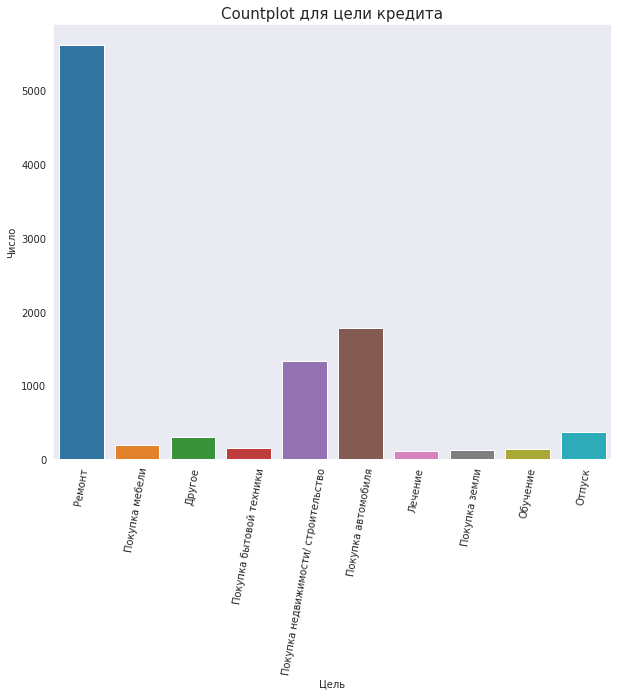

In [29]:
plot = sns.countplot( x="CREDIT_PURPOSE", data=df)
improve(plot, 'Countplot для цели кредита','Цель' ,'Число')
labels = plot.set_xticklabels(labels = plot.get_xticklabels(), rotation=80)

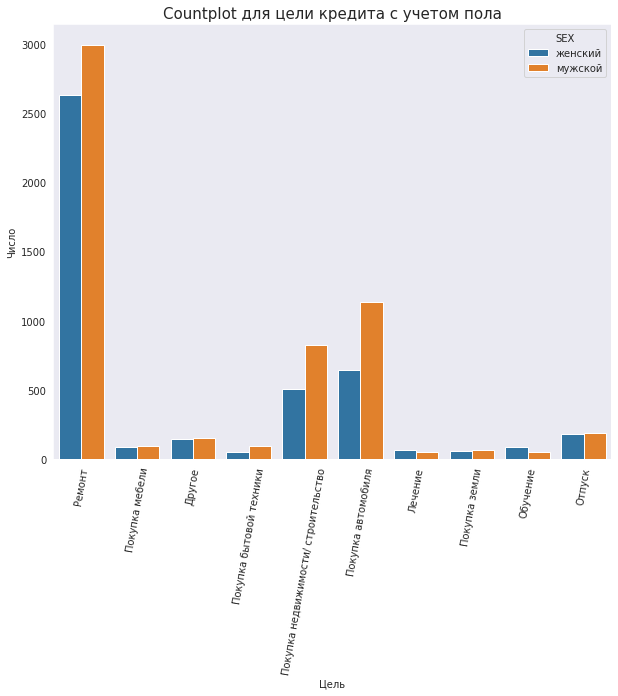

In [30]:
plot = sns.countplot( x="CREDIT_PURPOSE", hue='SEX', data=df)
improve(plot, 'Countplot для цели кредита с учетом пола','Цель' ,'Число')
labels = plot.set_xticklabels(labels = plot.get_xticklabels(), rotation=80)

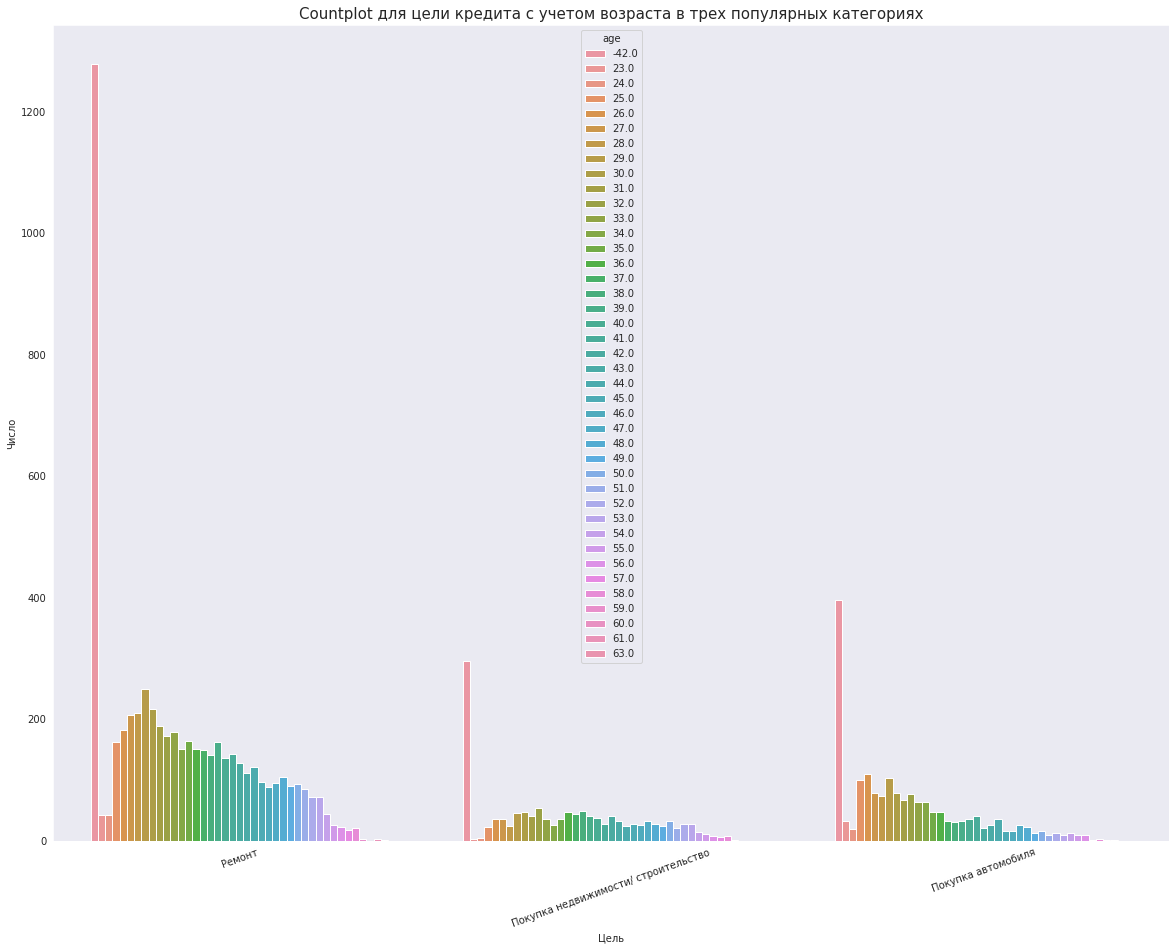

In [31]:
plot = sns.countplot( x="CREDIT_PURPOSE", hue='age', data=df[df['CREDIT_PURPOSE'].isin(['Ремонт', 'Покупка недвижимости/ строительство', 'Покупка автомобиля'])])
improve(plot, 'Countplot для цели кредита с учетом возраста в трех популярных категориях','Цель' ,'Число')
labels = plot.set_xticklabels(labels = plot.get_xticklabels(), rotation=20)
plot.figure.set_size_inches(20, 15)

Как видим самой популярной категорией является ремонт, также можно заметить что мужчины гараздо чаще чем женщины берут кредиты, но в категориях 'Лечение' и 'Образование' больше кредитов берут женщины.  
В случае с возрастом можно заметить, что в категории ремонт клиенты в возрасте 28($\pm$ 5) берут кредит чаще, тоже самое наблюдается в категории 'покупка автомобиля', а вот в случае категории 'Покупка недвижимости/строительство' распределение более менее равномерное

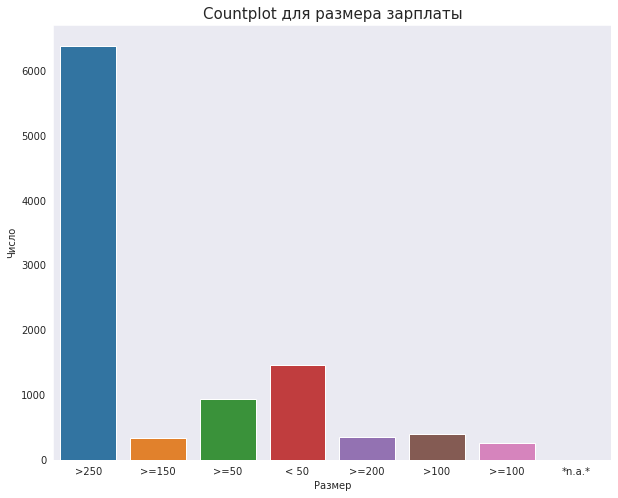

In [32]:
plot = sns.countplot(data=df, x='EMPL_SIZE')
improve(plot, 'Countplot для размера зарплаты','Размер' ,'Число')

Как видим большинство клиентов получает либо меньше 50, либо больше 250

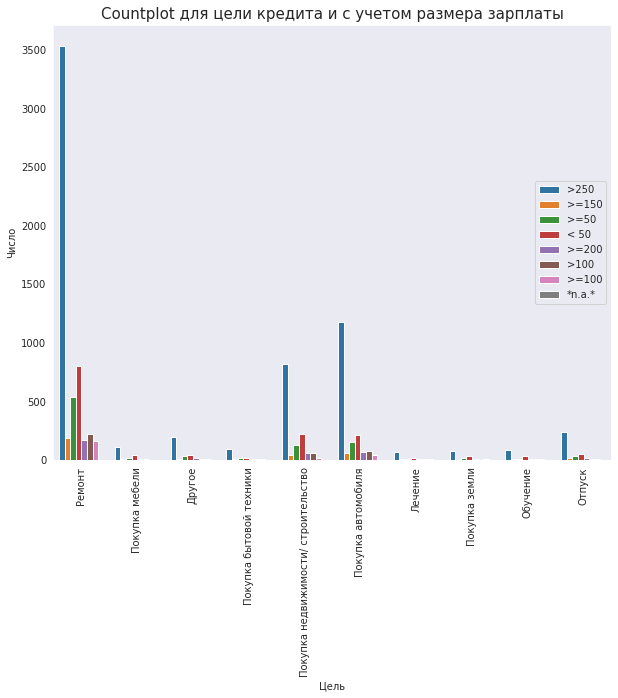

In [33]:
plot = sns.countplot(data=df, x='CREDIT_PURPOSE', hue='EMPL_SIZE')
improve(plot, 'Countplot для цели кредита и с учетом размера зарплаты','Цель' ,'Число')
labels = plot.set_xticklabels(labels = plot.get_xticklabels(), rotation=90)
plot.legend(loc = 'right')

Как видим, почти во всех категориях люди с зарплатой больше 250 занимают большую часть

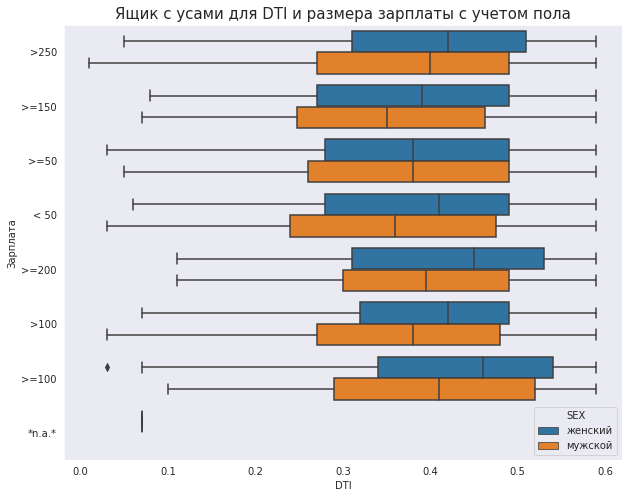

In [34]:
plot = sns.boxplot(data=df, x='DTI', y='EMPL_SIZE', hue='SEX')
improve(plot, 'Ящик с усами для DTI и размера зарплаты с учетом пола','DTI' ,'Зарплата')

Как видим среднее отношение долга к доходам колеблется в районе 0.4, а максимальное 0.6.
Также можно заметить, что у женщин ситуация немного хуже чем у мужчин: их DTI немнго выше (чем DTI ниже тем лучше)

Временно добавим новый признак: возрастная группа

In [35]:
df['age'].unique()

array([ 45.,  50.,  56.,  27.,  26., -42.,  29.,  30.,  51.,  23.,  25.,
        54.,  57.,  36.,  32.,  33.,  28.,  35.,  37.,  40.,  49.,  24.,
        44.,  39.,  52.,  41.,  31.,  38.,  47.,  46.,  48.,  34.,  43.,
        53.,  42.,  58.,  55.,  59.,  61.,  63.,  60.])

In [36]:
df['age_gr'] = 'Взрослые'
df.loc[df['age'] > 50, ['age_gr']] = 'Старые'
df.loc[df['age'] < 28, ['age_gr']] = 'Молодые'
df.loc[df['age'] == -42, ['age_gr']] = 'Отсутствует возраст'

In [37]:
df['age_gr'].unique()

array(['Взрослые', 'Старые', 'Молодые', 'Отсутствует возраст'],
      dtype=object)

Посмотрим на распределение DTI по возрастной группе:

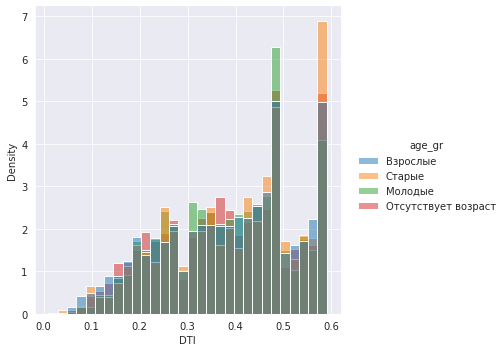

In [38]:
plot = sns.displot(data=df, x='DTI', hue='age_gr', stat="density", common_norm=False)

Посмотрим на ящик с усами для DTI по возрастной группе:

<AxesSubplot:xlabel='DTI', ylabel='age_gr'>

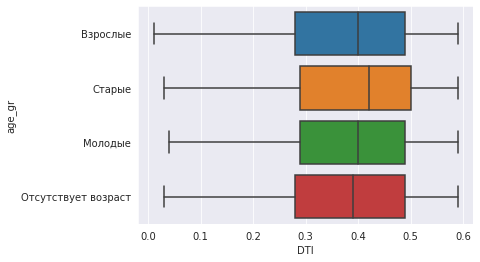

In [39]:
sns.boxplot(data=df, x='DTI', y='age_gr')

Посмотрим на распределение количества кредитов по возрастной группе:

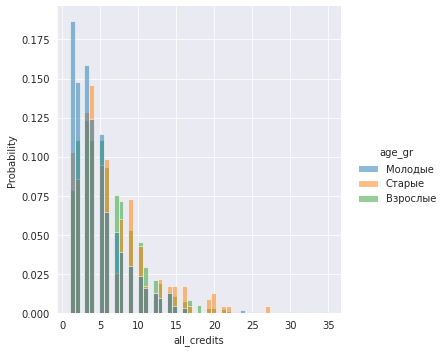

In [40]:
sns.displot(data=df[df['all_credits'] != -42], x='all_credits', hue='age_gr', stat="probability", common_norm=False)

Посмотрим на ящик с усами для количества кредитов по возрастной группе:

<AxesSubplot:xlabel='all_credits', ylabel='age_gr'>

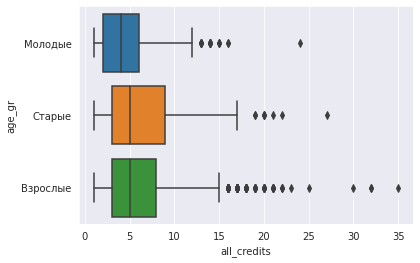

In [41]:
sns.boxplot(data=df[df['all_credits'] != -42], x='all_credits', y='age_gr')

Видим, что молодые люди берут меньше кредитов чем взрослое или саршее поколение, при этом представители старшего поколения имеют больше кредитов

Посмотрим на ящик с усами для числа активных счетов:

<AxesSubplot:xlabel='numAccountActiveAll', ylabel='age_gr'>

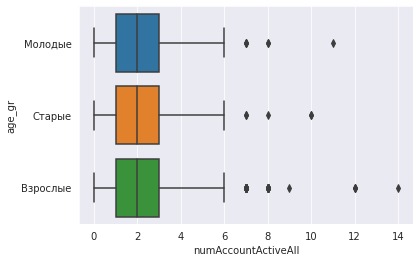

In [42]:
sns.boxplot(data=df[df['numAccountActiveAll'] != -42], x='numAccountActiveAll', y='age_gr')

Тут видим, что в среднем количество счетов одинаковое

In [43]:
del df['age_gr'] #удаляем временный признак

Исходя из таблиц и графиков сделанных выше, можем сделать вывод, что у нас есть распределение на 2 группы:  
1) Молодые люди не охотно берущие кредиты  
2) Более взрослое поколение обладающее значительной кредитной историей  

# Часть 2

Перейдем к построению кластеризации

В качестве первого метода я решил выбрать KMEans:

In [44]:
df[categorical[:-1]] = df[categorical[:-1]].astype(str)

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical[:-1]),
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', KMeans(n_clusters=4, random_state=42))
])

model = pipeline.fit(df)
y_pred = model.predict(df)

In [46]:
data_1 = df.copy()

data_1['segment'] = y_pred

In [47]:
segment_0 = data_1[data_1['segment'] == 0]
segment_1 = data_1[data_1['segment'] == 1]
segment_2 = data_1[data_1['segment'] == 2]
segment_3 = data_1[data_1['segment'] == 3]

Т.к. у нас достаточно много признаков, рассмотрение их всех для каждого сегмента будет сложно интерпретировать, поэтому отберем наиболее важные признаки:  
* Period_at_work
* CREDIT_PURPOSE
* INSURANCE_FLAG
* DTI
* SEX
* FULL_AGE_CHILD_NUMBER
* DEPENDANT_NUMBER
* EMPL_SIZE
* EMPL_FORM
* EMPL_TYPE
* EMPL_PROPERTY
* EDUCATION
* BANKACCOUNT_FLAG
* age
* FAMILY_STATUS
* all_credits
* Active_not_cc
* dlq_exist
* sum_of_paym_months

Посмотрим на полученные сегменты:

In [48]:
main_features = ['Period_at_work', 'CREDIT_PURPOSE', 'INSURANCE_FLAG', 'DTI', 'SEX', 'FULL_AGE_CHILD_NUMBER',
                 'DEPENDANT_NUMBER', 'EMPL_SIZE', 'BANKACCOUNT_FLAG', 'age', 'FAMILY_STATUS', 'all_credits',
                'Active_not_cc', 'dlq_exist', 'sum_of_paym_months', 'EMPL_PROPERTY', 'EMPL_TYPE', 'EMPL_FORM', 'EDUCATION']
nums = np.intersect1d(main_features, numeric)
cats = np.intersect1d(main_features, categorical)



In [49]:
def draw_categorical(segm, data_1, lst, text):
    f, axes = plt.subplots(lst.shape[0], 2,figsize=(15,24))
    axes[0, 0].title.set_text(text)
    axes[0, 1].title.set_text('ALL')
    for i, feature in enumerate(lst):
        #axes[i // 2, i % 2].set_xticklabels(labels = axes[i // 2, i % 2].get_xticklabels(), rotation=80)
        sns.countplot(data=segm, y=feature, ax=axes[i, 0])
        sns.countplot(data=data_1, y=feature, ax=axes[i, 1])
        axes[i, 1].set(ylabel=None)

In [50]:
def draw_numeric(segm, data_1, lst, text):
    f, axes = plt.subplots(lst.shape[0], 2,figsize=(15,15))
    axes[0, 0].title.set_text(text)
    axes[0, 1].title.set_text('ALL')
    for i, feature in enumerate(lst):
        #axes[i // 2, i % 2].set_xticklabels(labels = axes[i // 2, i % 2].get_xticklabels(), rotation=80)
        sns.histplot(data=segm, y=feature, ax=axes[i, 0])
        sns.histplot(data=data_1[data_1[feature] != -42], y=feature, ax=axes[i, 1])
        axes[i, 1].set(ylabel=None)

In [51]:
print('Размер сегмента 0:', segment_0.shape[0])
print('Размер сегмента 1:', segment_1.shape[0])
print('Размер сегмента 2:', segment_2.shape[0])
print('Размер сегмента 3:', segment_3.shape[0])

Размер сегмента 0: 1864
Размер сегмента 1: 3607
Размер сегмента 2: 2278
Размер сегмента 3: 2382


Как видим сегменты получились примерно одинаковые по размеру

### Сегмент 0:

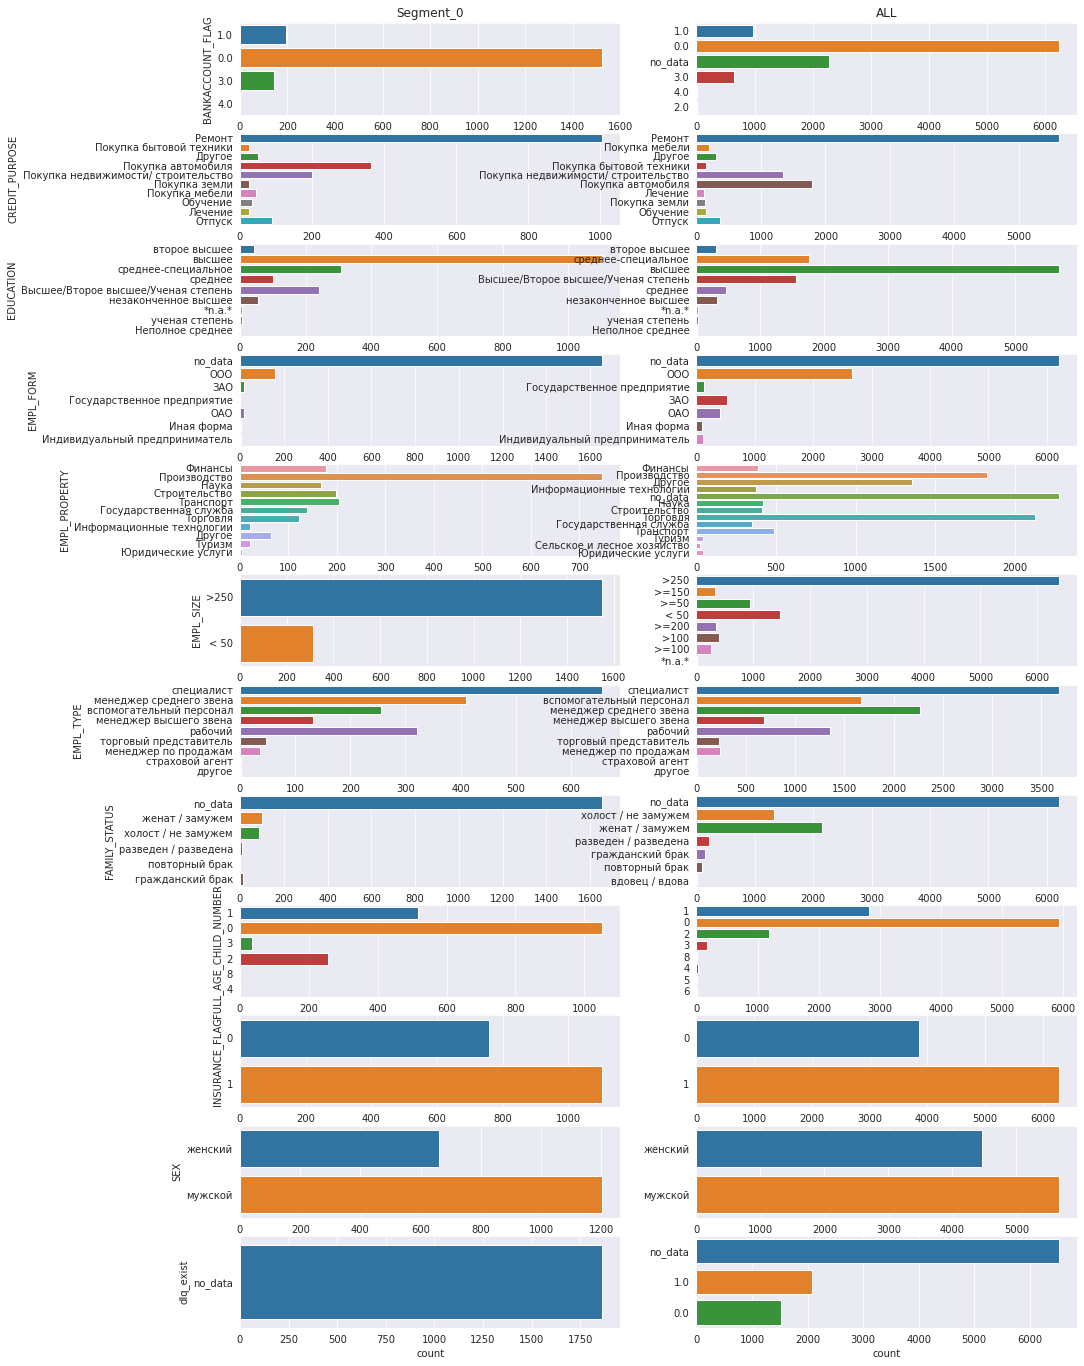

In [52]:
draw_categorical(segment_0, data_1, cats, 'Segment_0')

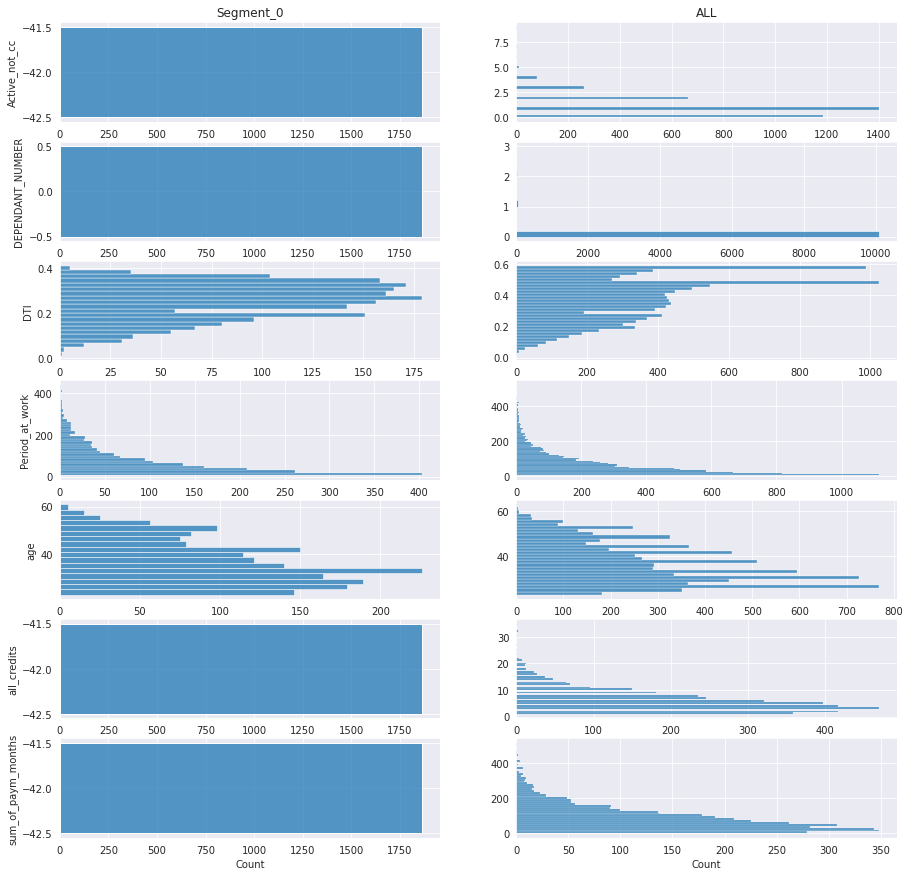

In [53]:
draw_numeric(segment_0, data_1, nums, 'Segment_0')

### Сегмент 1:

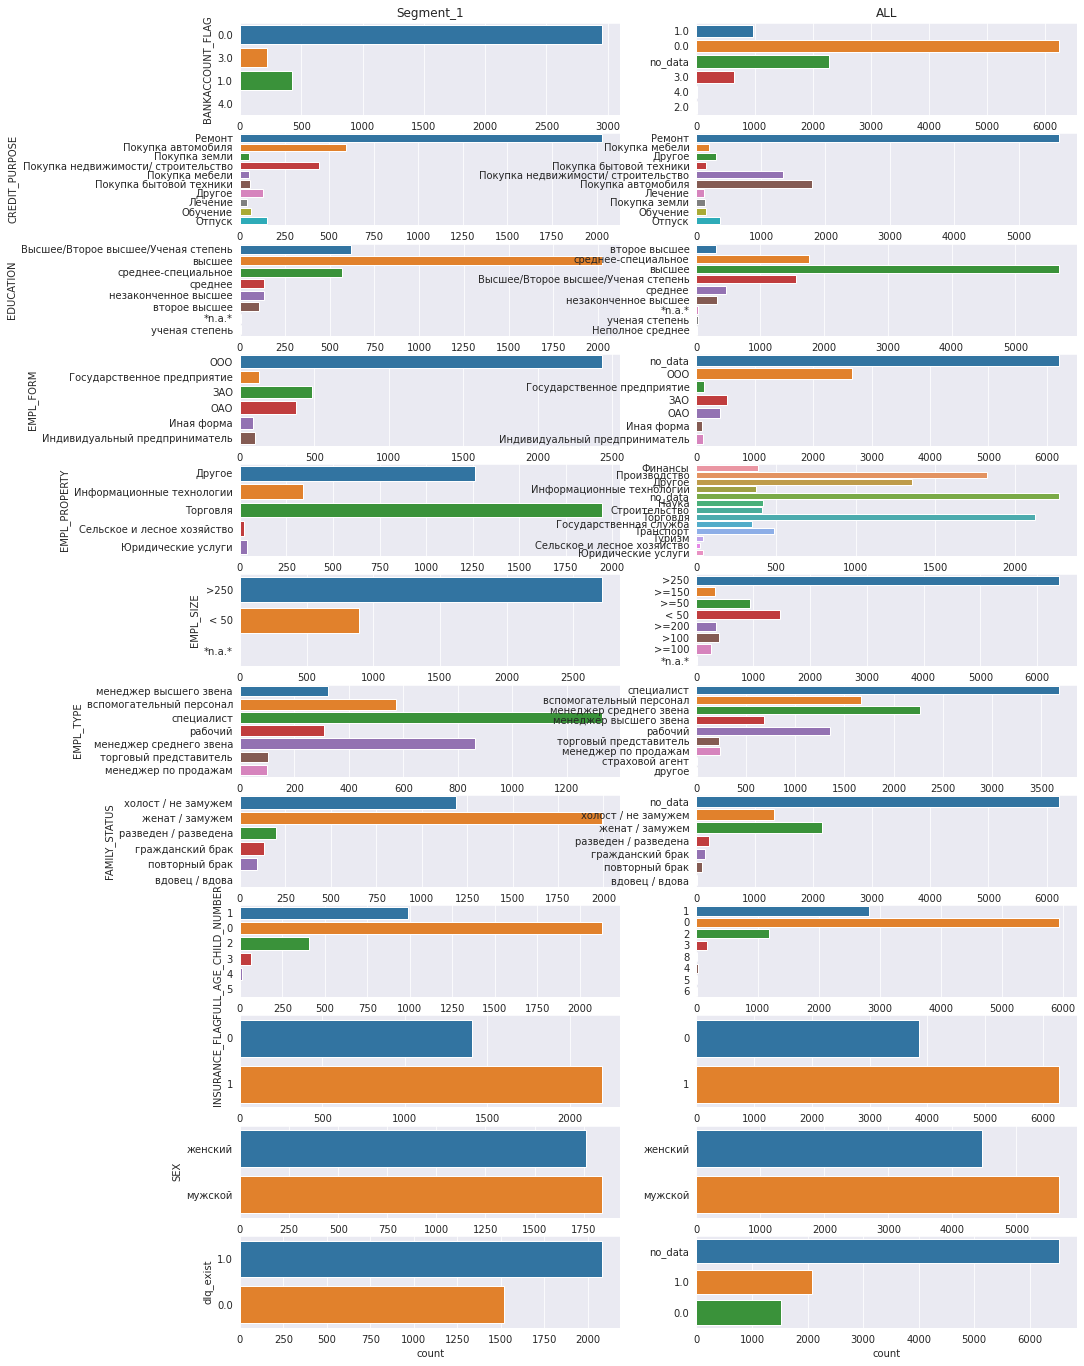

In [54]:
draw_categorical(segment_1, data_1, cats, 'Segment_1')

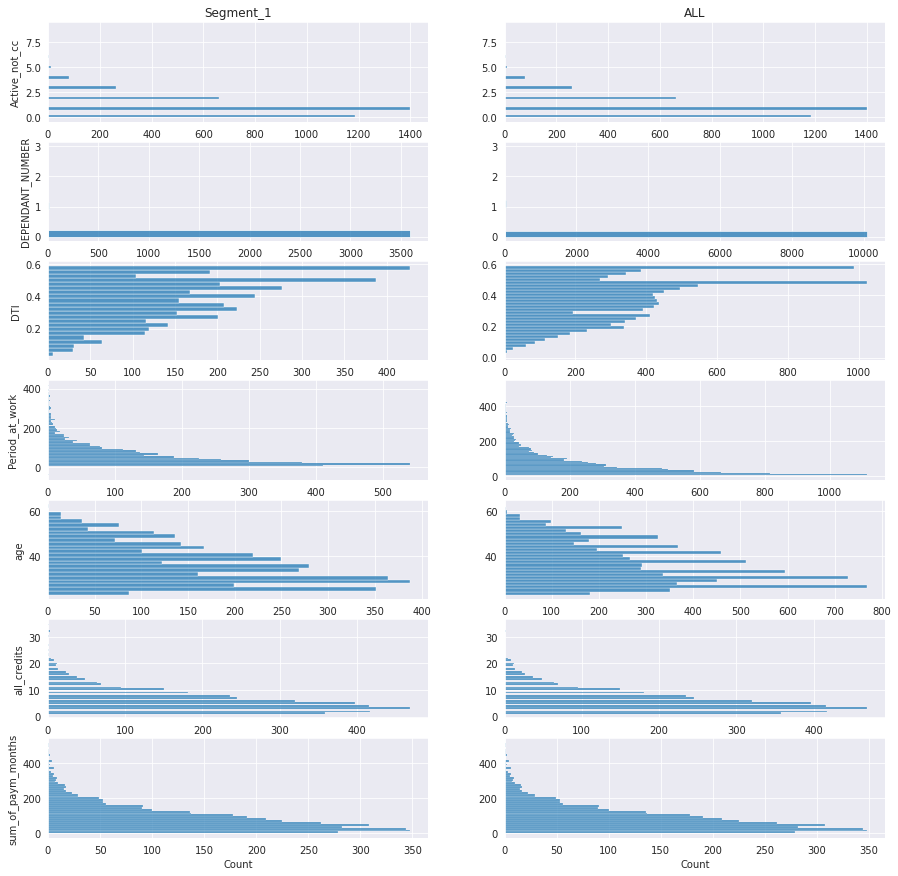

In [55]:
draw_numeric(segment_1, data_1, nums, 'Segment_1')

### Сегмент 2:

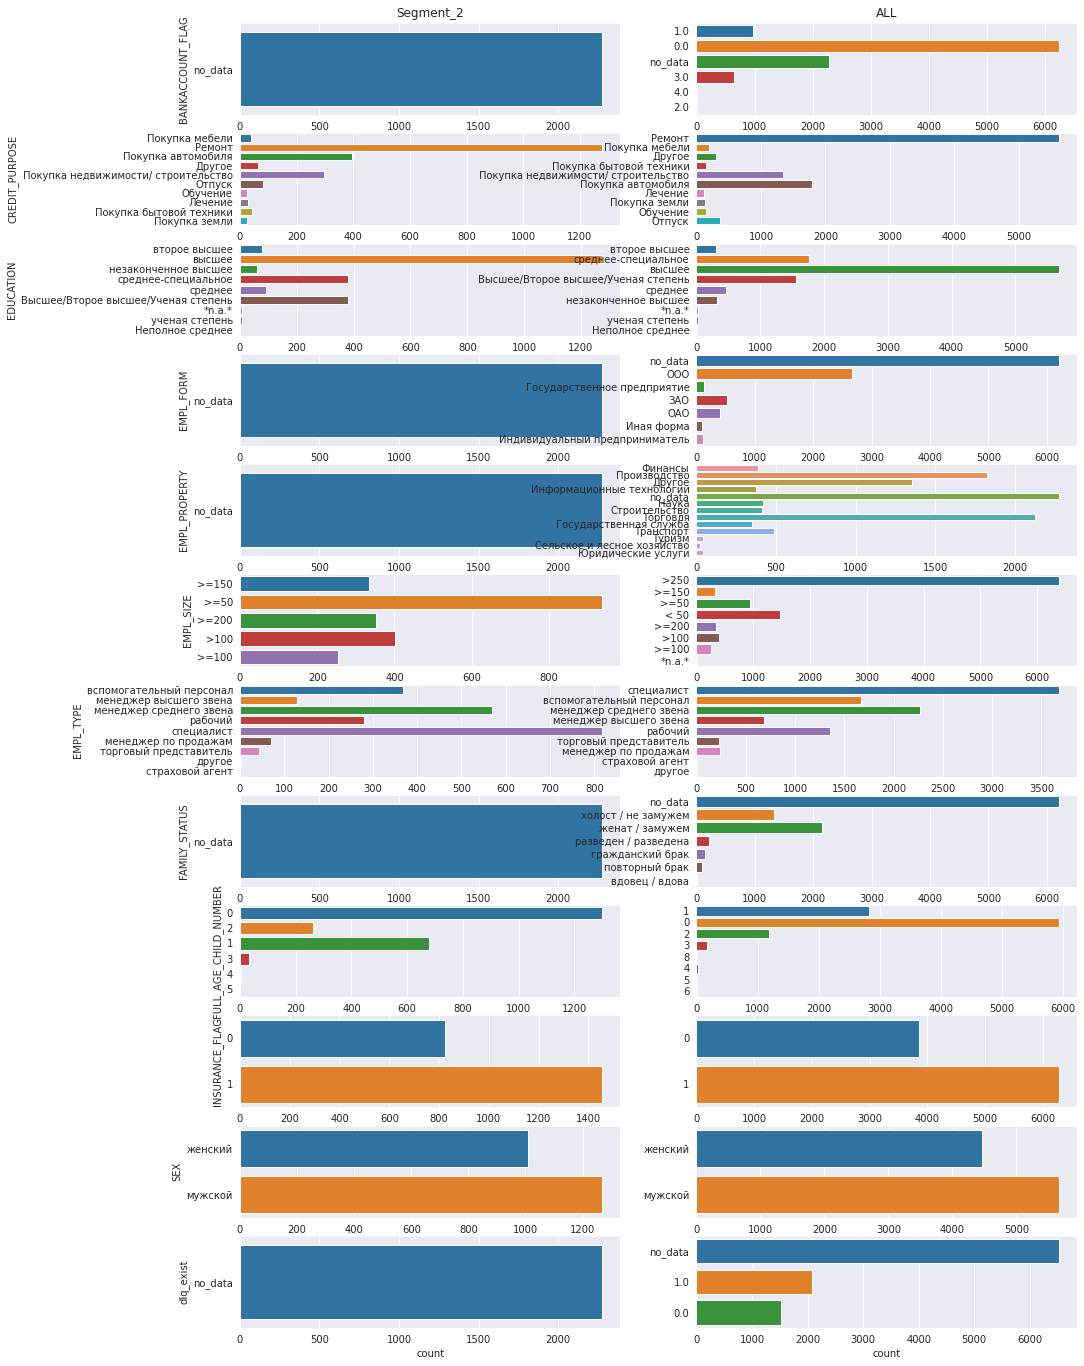

In [56]:
draw_categorical(segment_2, data_1, cats, 'Segment_2')

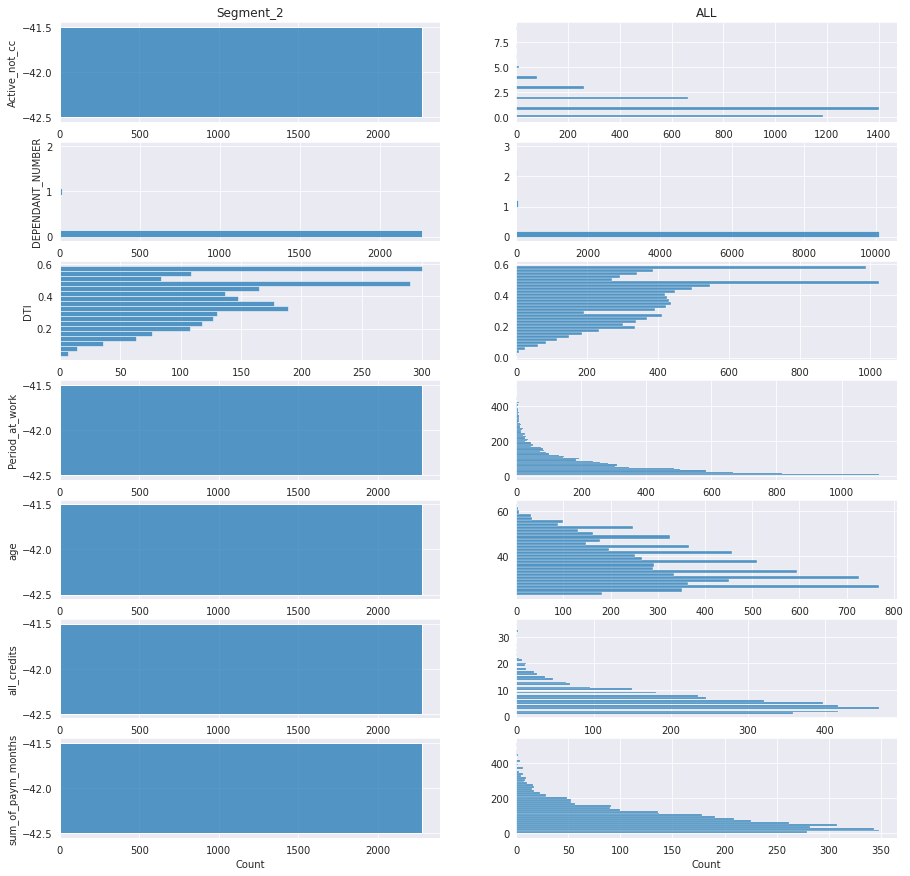

In [57]:
draw_numeric(segment_2, data_1, nums, 'Segment_2')

### Сегмент 3:

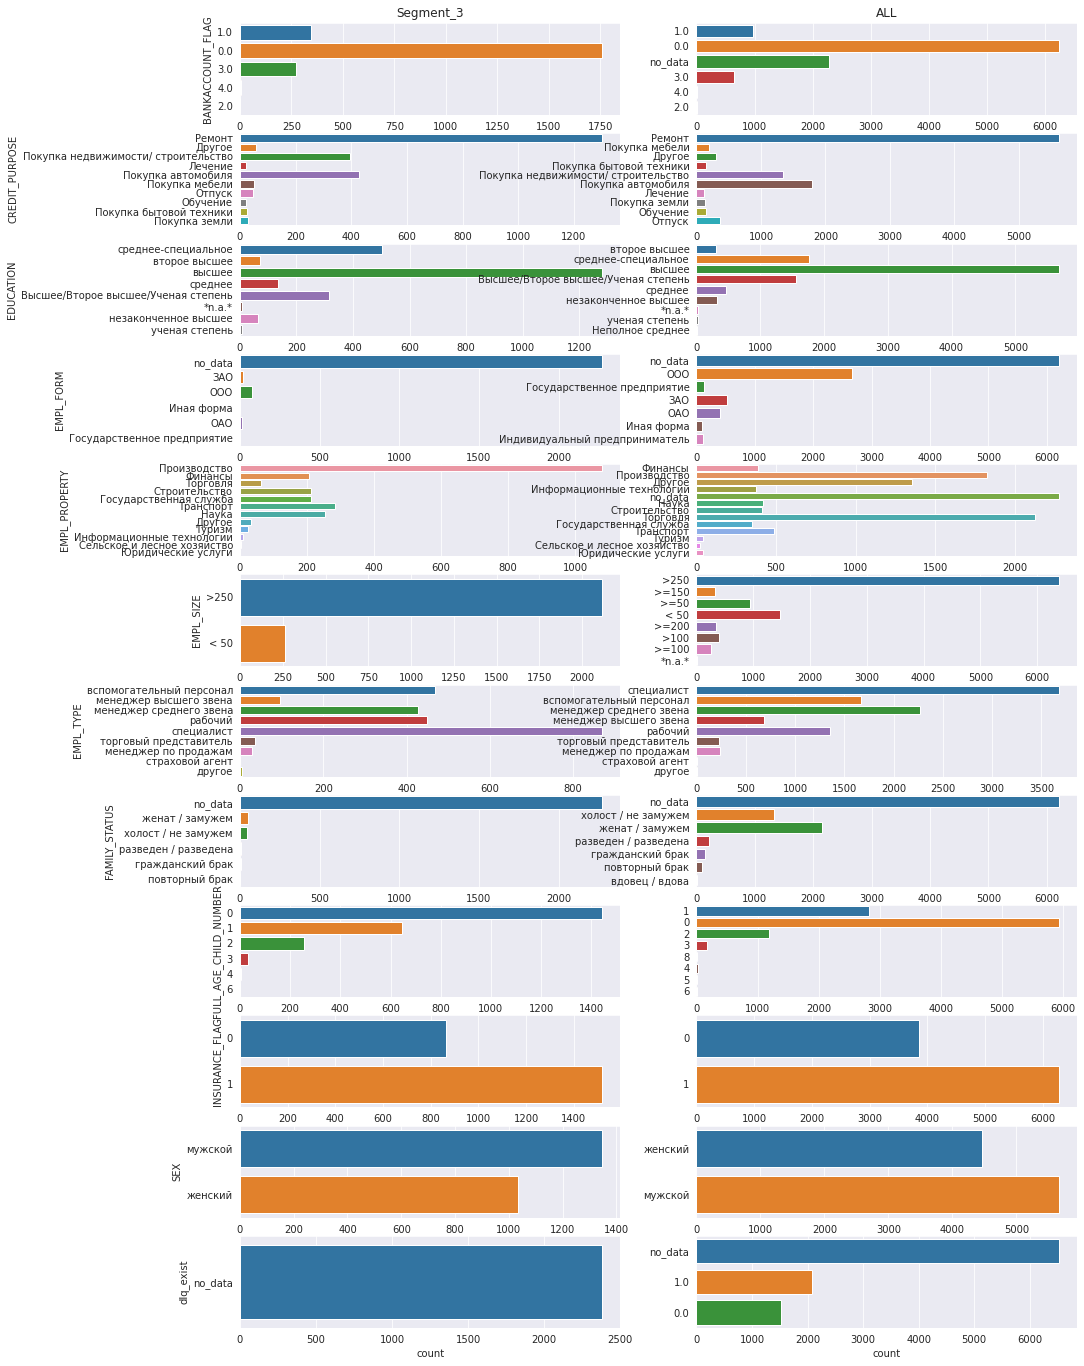

In [58]:
draw_categorical(segment_3, data_1, cats, 'Segment_3')

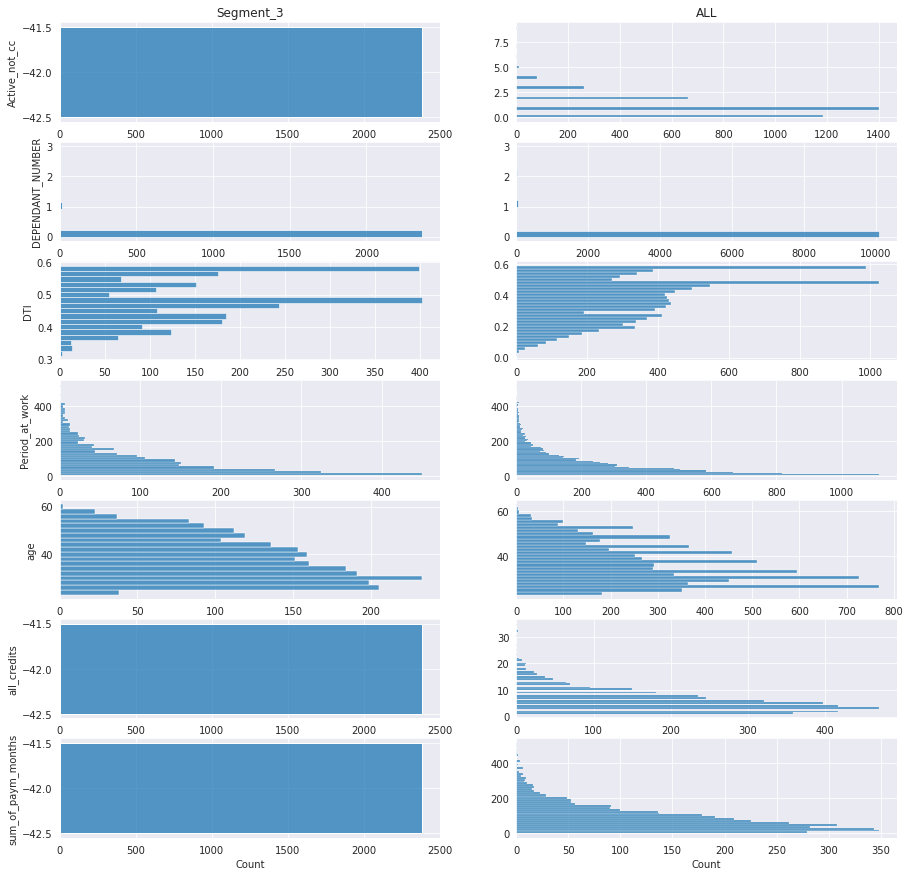

In [59]:
draw_numeric(segment_3, data_1, nums, 'Segment_3')

In [60]:
data_1['sgm_name'] = 'segment_0'
data_1.loc[data_1['segment'] == 1, 'sgm_name'] = 'segment_1'
data_1.loc[data_1['segment'] == 2, 'sgm_name'] = 'segment_2'
data_1.loc[data_1['segment'] == 3, 'sgm_name'] = 'segment_3'

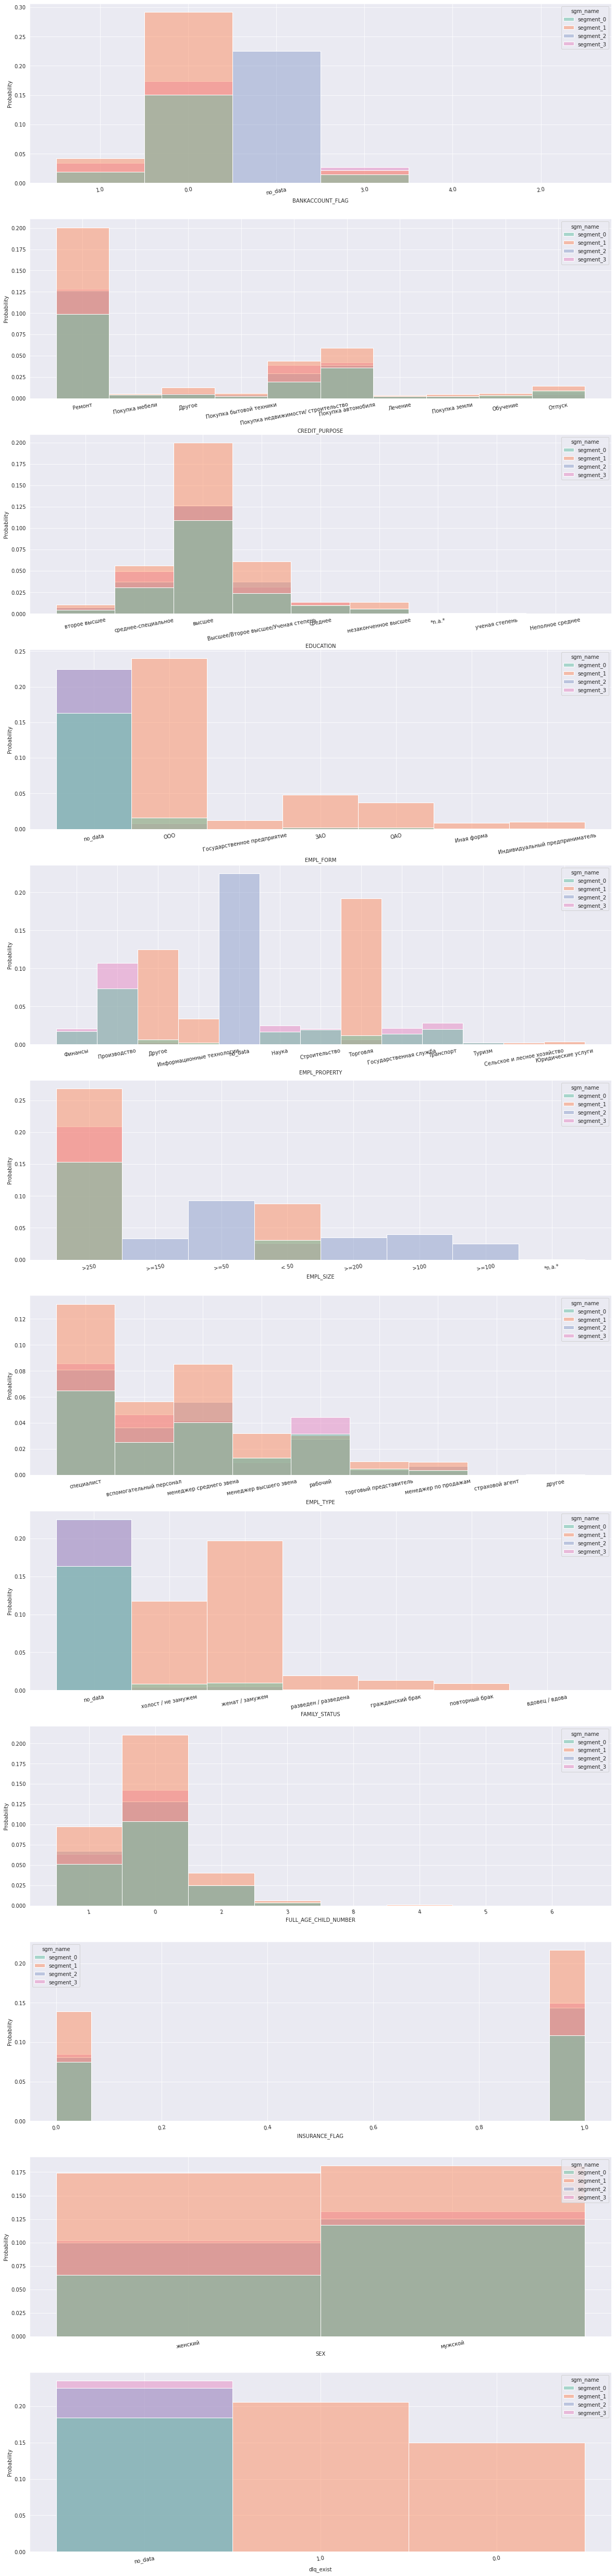

In [61]:
f, axes = plt.subplots(cats.shape[0], 1,figsize=(20,90))
for i, feature in enumerate(cats):
    sns.histplot(data=data_1, x=feature, hue = 'sgm_name', ax=axes[i], palette='Set2',  hue_order=['segment_0', 'segment_1', 'segment_2','segment_3'], stat='probability', common_norm=True)
    #axes[i].set_xticklabels(labels = axes[i].get_xticklabels(), rotation=80)
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=10)

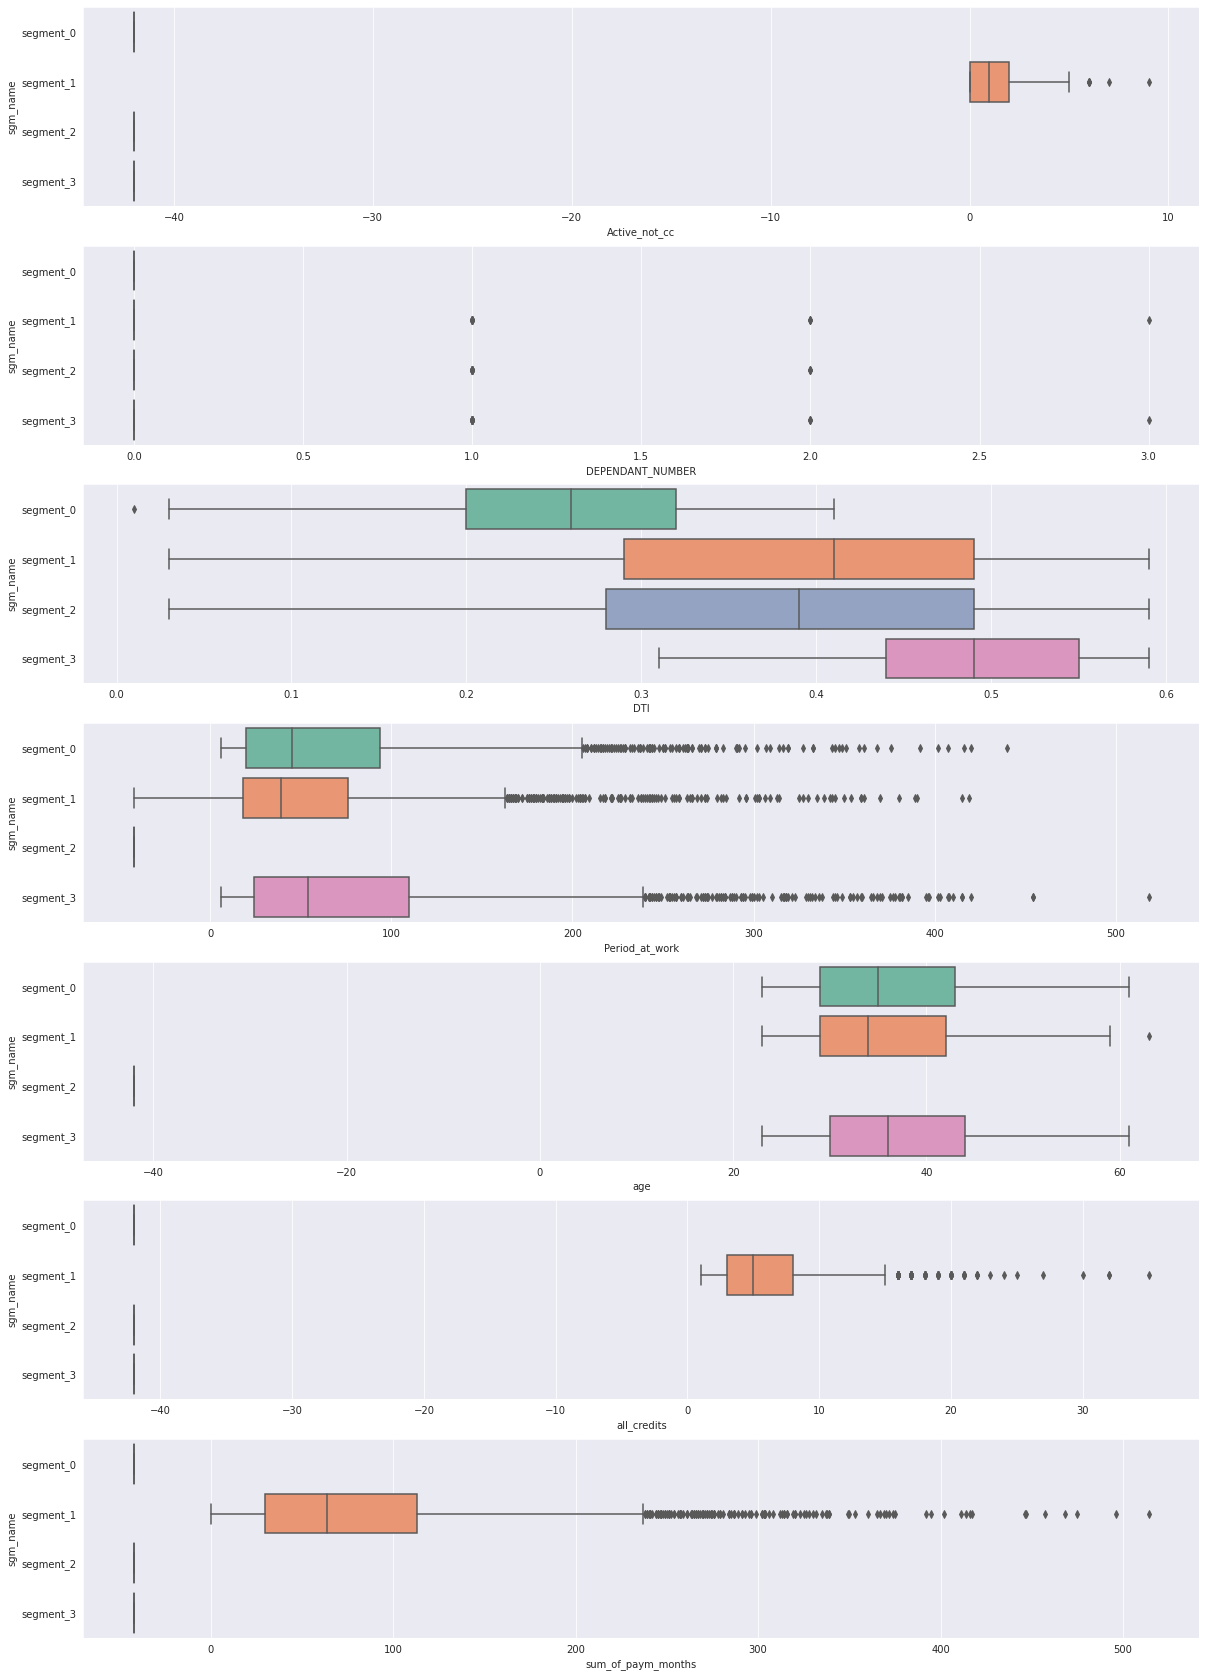

In [62]:
f, axes = plt.subplots(nums.shape[0], 1,figsize=(20,30))
for i, feature in enumerate(nums):
    sns.boxplot(data=data_1, x=feature, y='sgm_name', ax=axes[i], palette='Set2', order=['segment_0', 'segment_1', 'segment_2','segment_3'])
    #axes[i].set_xticklabels(labels = axes[i].get_xticklabels(), rotation=80)
    #plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=10)

In [63]:
print('DTI segment 0:', segment_0.DTI.mean())
print('DTI segment 1:', segment_1.DTI.mean())
print('DTI segment 2:', segment_2.DTI.mean())
print('DTI segment 3:', segment_3.DTI.mean())

DTI segment 0: 0.25202789699570816
DTI segment 1: 0.39231771555309125
DTI segment 2: 0.3855399473222125
DTI segment 3: 0.48918975650713686


In [64]:
print('Возраст segment 0:', segment_0.age.median())
print('Возраст segment 1:', segment_1.age.median())
print('Возраст segment 2:', segment_2.age.median())
print('Возраст segment 3:', segment_3.age.median())

Возраст segment 0: 35.0
Возраст segment 1: 34.0
Возраст segment 2: -42.0
Возраст segment 3: 36.0


Несмотря на фиксацию случайности сегменты

### Описание сегмента 0:

У большинства клиентов отсутсвует онлайн кабинета

У большинства клиентов не указана организационно-правовая форма

Наиболее популярные сферы бизнеса:

1) Производтсво

2) Финансы строительство транспорт и наука

Размер зарплаты либо больше 250 либо меньше 50

Наиболее популярные должности:

1) Специалист 

2) менеджер среднего звена

3) рабочий

4) вспомогательный персонал

Отсутствуют данные о семейном положении

Дети отсутствуют

Преобладают мужчины

Данные по активным не кредитным счетам отсутсвуют

DTI среднем не плохой (около 0.25)

Возраст в среднем 35

Информации о просрочки нету(будем расценивать что просрочки нету)

Информации о кредитах нету

Информации о последних платежах нету

### Описание сегмента 1:

 У большинства клиентов отсутсвует онлайн кабинет 

Наиболее популярная организационно-правовая форма: ООО 

Следом идут: ЗАО и ОАО (в целом данный признак более разнообразный)

Наиболее популярные сферы бизнеса:

Торговля, ИТ, Другое

Распределение должностей как у сегмента 0

Детей нету

Большинство имеют супруга(супругу)

Ситуация с зарплатами такая же как и у сегмента 0

Женщин поровну с мужчинами(почти)

Уже есть информация о просрочках (и у большинства она есть)

Есть активные не кредитные счета(в среднем 1-2)

DTI уже хуже (в среднем примерно 0.39)

Иждивенцы отсутсвуют

Опять же возраст распределён примерно также как и в сегменте 0

В среднем кредитов примерно 5

Средняя сумма выплат составляет примерно 150

### Описание сегмента 2:

Нету данных об онлайн аккаунте

Нету данных о правовой форме

Нет данных о сфере бизнеса 

Более разнообразные зарплатные данные

Нету данных о семейном статусе 

Нету данных о задолженностях

Нету данных о активных не кредитных счетах

Средний DTI 0.39

Данных о возрасте нету

Данных о времени работы нету

Данных о кредитах нету

Данных о выплатах нету

### Описание сегмента 3:

Онлайн аккаунта в большинстве случаев нету

Нету данных о правовой форме

Наиболее популярная сфера бизнеса: Производство

Наиболее популярные должности:

Специалист, рабочий, менеджер среднего звена, вспомогательный персонал

Нету данных о семейном статусе

Дети отсутсвуют

Данные о задолженностях отсутсвуют

Данные об активных не кредитных счетах отсутсвуют

Средний DTI очень плохой (0.48)

Отсутсвует информация о количестве кредитов

Отсутсвует информация о выплатах за последний месяц

Таким образом на основе проведенной сегментации можно выделить 4 сегмента:   
Сегмент 0 - люди не имеющие активной кредитной истории  
Сегмент 1 - основной сегмент, люди имеющие кредитную историю, с ежемесячными выплатами 150 тыс  
Сегмент 2 - люди переживающие за безопасность своих персональных данных (при этом DTI как у сегмента 1, что  наводит на мысль, что данный сегмент может являться частью сегмента 1)  
Сегмент 3 - заядлые должники с самым худшим DTI (в среднем 0.48)  

Рекомендации для каждого сегмента:  
**Сегмент 0:**  
Цель: Привлечение клиентов  
Потенциальное предложение: кредит по сниженной ставке / специализированные кредиты для наиболее популярных категорий (ремонт/покупка авто)

**Сегмент 1:**  
Цель: Удержание клиентов  
Потенциальное предложение: персонализированные предложения

**Сегмент 2:**
Цель: Повышение доверия  
Потенциальное предложение: Уделение особого внимяния безопасности данных при общении с клинетами из данного сегмента

**Сегмент 3:**
Цель: Контроль  
Данный сегмент является опасным т.к. зачастую банки не выдают кредиты людям с таким высоким значением DTI, так же по информации с сайта:https://mycreditinfo.ru/kakoj_u_vas_dti "С октября 2019 DTI стал обязательным параметром при оценке заемщиков. Центробанк сделал так, чтобы банкам было невыгодно кредитовать заемщиков с высокой долговой нагрузкой." Поэтому необходимо отслеживать клиентов из данного сегмента и в случае снижения DTI до приемлимого уровня переводить их в сегмент 1

Сегментация с помощью бизнес-правил:

Бизнес-задача: таргетировать группы с различными значениями DTI в зависимости от цели кредита  

Бизнес правила:  
1) По DTI  
* dti < 0.20
* dti > 0.40
* dti in (0.20, 0.40)

2) По цели кредита:
* Ремонт
* Покупка
* Услуга
* Другое

Т.к. данный тип сегментации делается вручную, выбрем 11 признаков, которые будем использовать:  
FAMILY_STATUS
SEX  
INCOME_BASE_TYPE  
Period_at_work  
numAccountActiveAll 
sum_of_paym_months  
all_credits  
max_MnthAfterLoan  
age  
Active_not_cc  
Active_to_All_prc

In [65]:
features = ['FAMILY_STATUS', 'SEX', 'INCOME_BASE_TYPE', 'Period_at_work', 'numAccountActiveAll',
           'sum_of_paym_months', 'all_credits', 'max_MnthAfterLoan', 'age', 'Active_not_cc', 'Active_to_All_prc']

nums = np.intersect1d(features, numeric)
cats = np.intersect1d(features, categorical)

In [66]:
df['dti_type'] = 'mid'
df.loc[df.DTI < 0.15, 'dti_type'] = 'low'
df.loc[df.DTI > 0.50, 'dti_type'] = 'big'

In [67]:
df['dti_type'].unique()

array(['mid', 'big', 'low'], dtype=object)

In [68]:
df['CREDIT_PURPOSE'].unique()

array(['Ремонт', 'Покупка мебели', 'Другое', 'Покупка бытовой техники',
       'Покупка недвижимости/ строительство', 'Покупка автомобиля',
       'Лечение', 'Покупка земли', 'Обучение', 'Отпуск'], dtype=object)

In [69]:
df['credit_category'] = 'Ремонт'
df.loc[df.CREDIT_PURPOSE.isin(['Покупка мебели', 'Покупка бытовой техники',
       'Покупка недвижимости/ строительство', 'Покупка автомобиля', 'Покупка земли']), 'credit_category'] = 'Покупка'
df.loc[df.CREDIT_PURPOSE.isin(['Лечение', 'Обучение', 'Отпуск']), 'credit_category'] = 'Услуги'
df.loc[df.CREDIT_PURPOSE.isin(['Другое']), 'credit_category'] = 'Другое'

In [70]:
df['CREDIT_PURPOSE'] = df['credit_category']
df['segment'] = 'low_Ремонт'

In [71]:
df['CREDIT_PURPOSE'].unique()

array(['Ремонт', 'Покупка', 'Другое', 'Услуги'], dtype=object)

In [72]:
#df.loc[(df.dti_type == 'low') & (df['CREDIT_PURPOSE'] == 'Ремонт'), 'segment'] = 'low_Ремонт'
df.loc[(df.dti_type == 'low') & (df['CREDIT_PURPOSE'] == 'Покупка'), 'segment'] = 'low_Покупка'
df.loc[(df.dti_type == 'low') & (df['CREDIT_PURPOSE'] == 'Услуга'), 'segment'] = 'low_Услуга'
df.loc[(df.dti_type == 'low') & (df['CREDIT_PURPOSE'] == 'Другое'), 'segment'] = 'low_Другое'

df.loc[(df.dti_type == 'mid') & (df['CREDIT_PURPOSE'] == 'Ремонт'), 'segment'] = 'mid_Ремонт'
df.loc[(df.dti_type == 'mid') & (df['CREDIT_PURPOSE'] == 'Покупка'), 'segment'] = 'mid_Покупка'
df.loc[(df.dti_type == 'mid') & (df['CREDIT_PURPOSE'] == 'Услуга'), 'segment'] = 'mid_Услуга'
df.loc[(df.dti_type == 'mid') & (df['CREDIT_PURPOSE'] == 'Другое'), 'segment'] = 'mid_Другое'

df.loc[(df.dti_type == 'big') & (df['CREDIT_PURPOSE'] == 'Ремонт'), 'segment'] = 'big_Ремонт'
df.loc[(df.dti_type == 'big') & (df['CREDIT_PURPOSE'] == 'Покупка'), 'segment'] = 'big_Покупка'
df.loc[(df.dti_type == 'big') & (df['CREDIT_PURPOSE'] == 'Услуга'), 'segment'] = 'big_Услуга'
df.loc[(df.dti_type == 'big') & (df['CREDIT_PURPOSE'] == 'Другое'), 'segment'] = 'big_Другое'

In [73]:
segms = df.segment.unique()

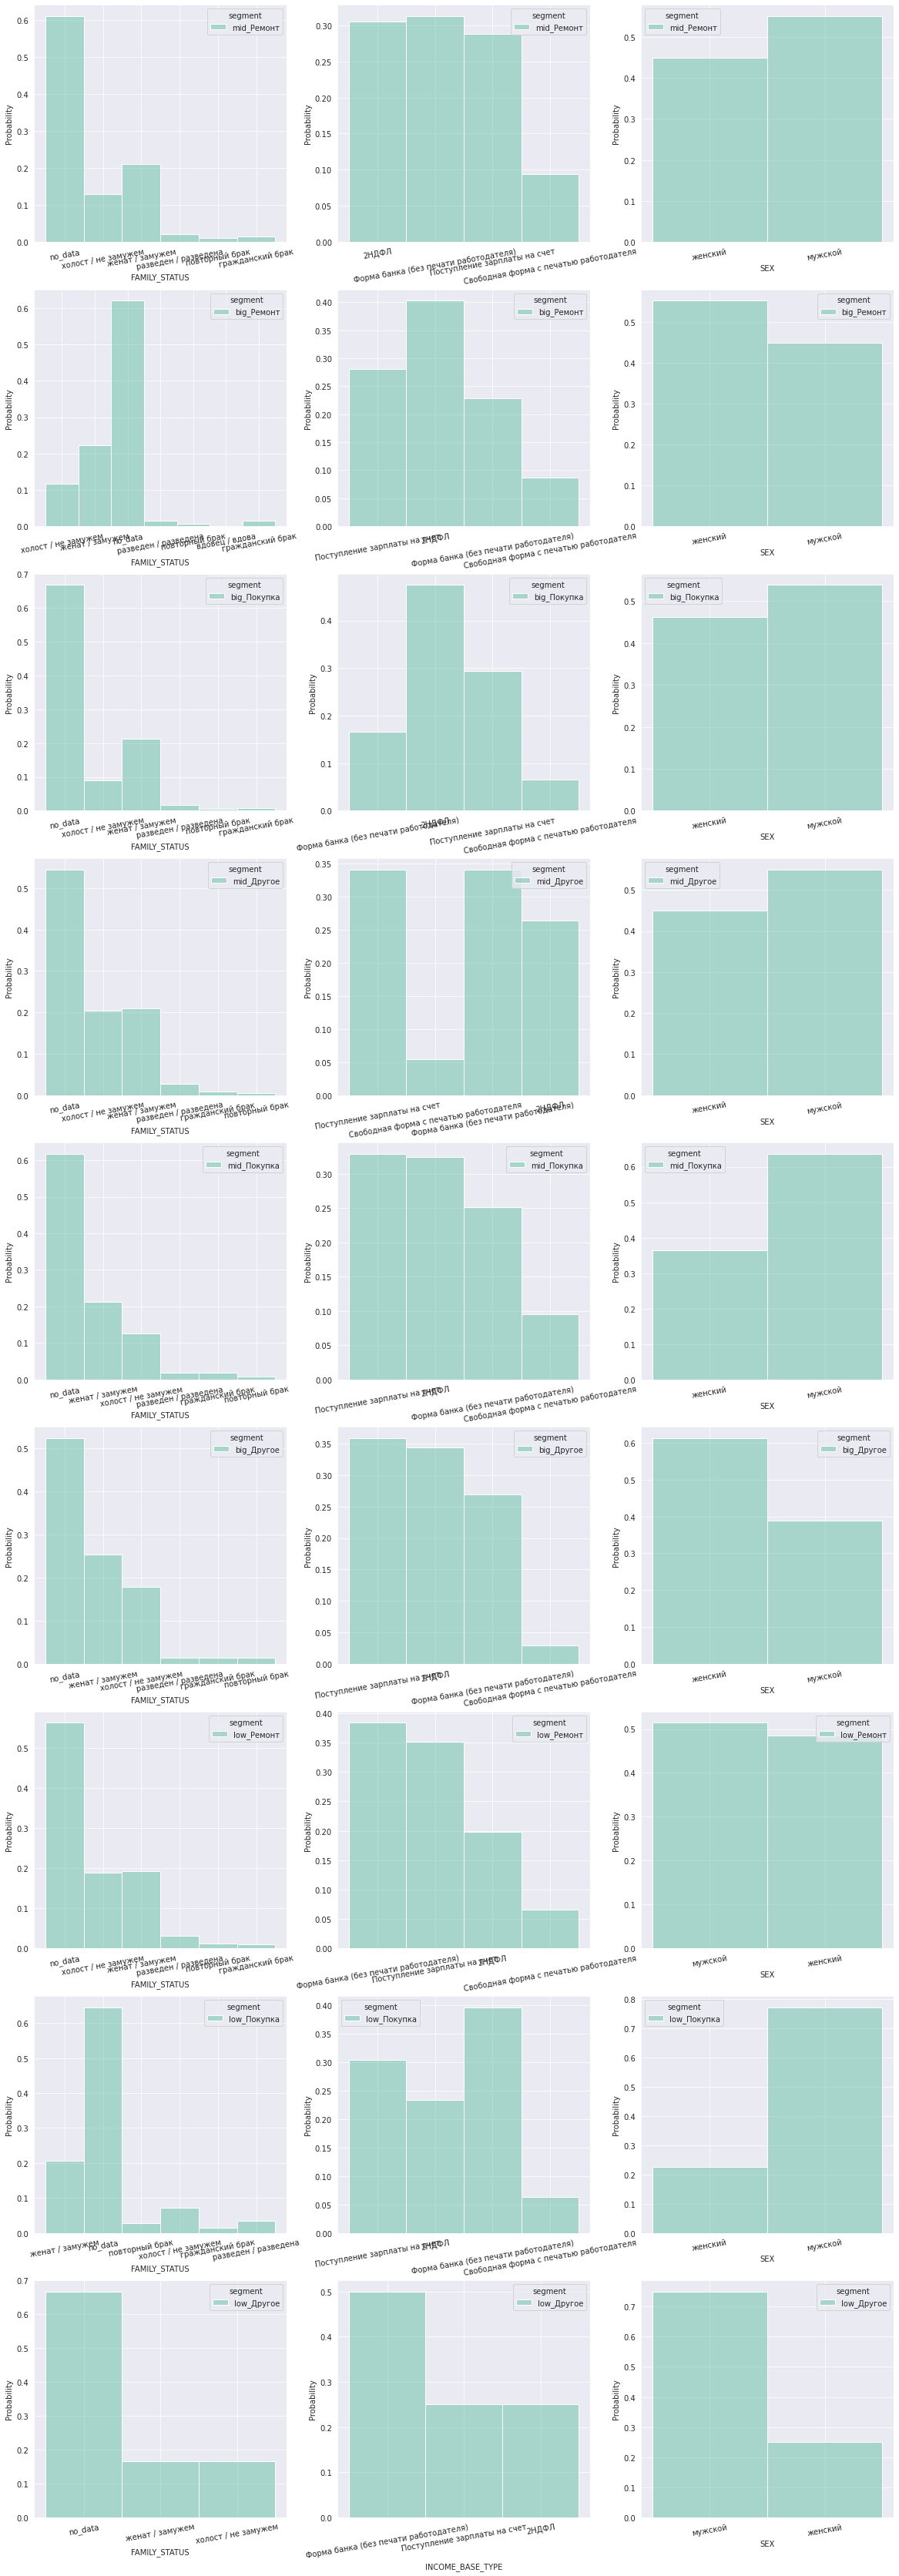

In [74]:
f, axes = plt.subplots(segms.shape[0], cats.shape[0],figsize=(20,60))
for j, feature in enumerate(cats):
    for i, seg in enumerate(segms):
        sns.histplot(data=df[df.segment == seg], x=feature, hue = 'segment', ax=axes[i, j], palette='Set2', stat='probability', common_norm=True)
    #axes[i].set_xticklabels(labels = axes[i].get_xticklabels(), rotation=80)
        plt.setp(axes[i, j].xaxis.get_majorticklabels(), rotation=10)

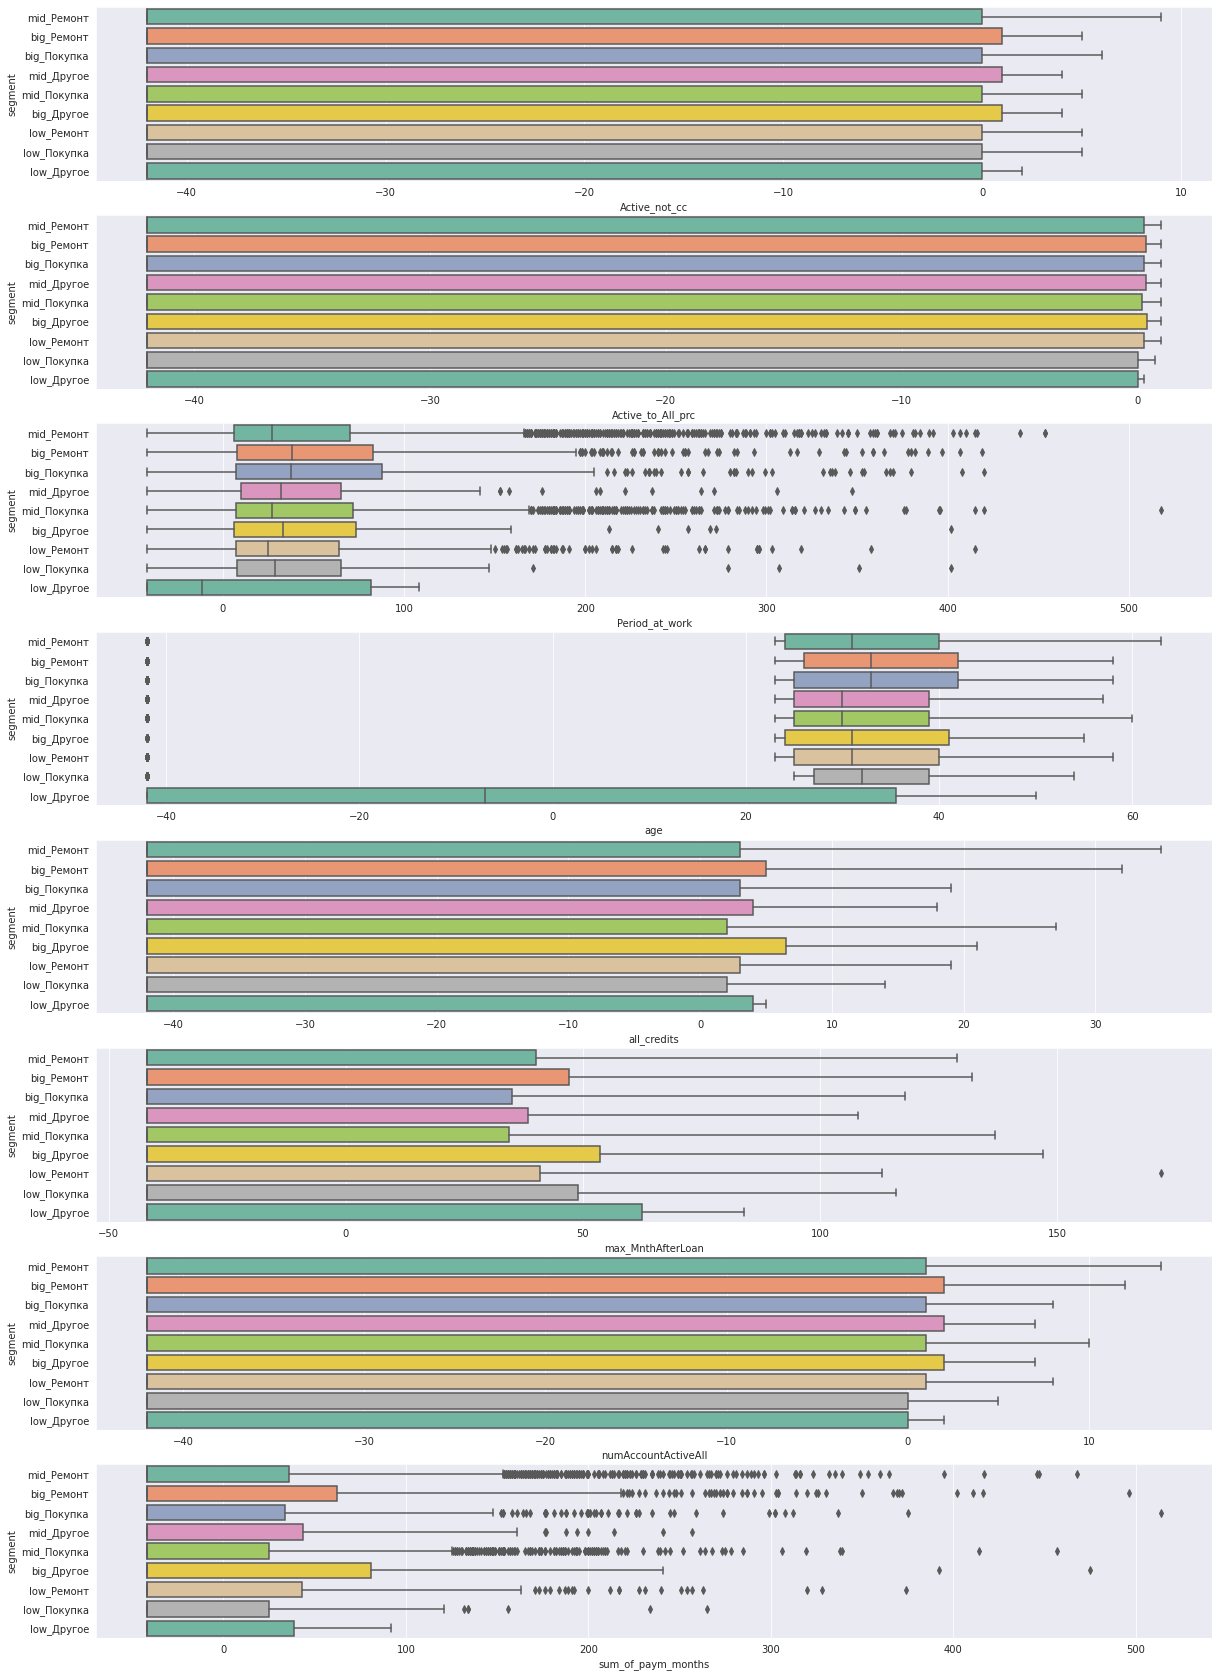

In [75]:
f, axes = plt.subplots(nums.shape[0], 1,figsize=(20,30))
for i, feature in enumerate(nums):
    sns.boxplot(data=df, x=feature, y='segment', ax=axes[i], palette='Set2')
    #axes[i].set_xticklabels(labels = axes[i].get_xticklabels(), rotation=80)
    #plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=10)

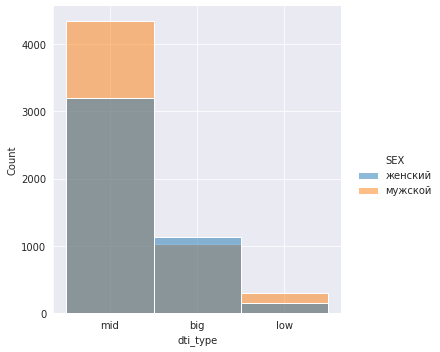

In [76]:
sns.displot(data=df, x='dti_type', hue='SEX')

Как видим расспределение не отличается нигде, за исключением 4 кластеров: low_другое и low_покупка в которых больше всего мужчин, и big_ремонт и big_другое в которых преобладают женщины, такми образом можно выделить три сегмента:  
Сегмент 1 - люди обладающие нормальным значением DTI (от 0.20 до 0.40)  
Сегмент 2 - мужчины с низким значением DTI(до 0.20), которые берут кредит в основном на категории покупок и другое  
Сегмент 3 - женщины с высоким значением DTI(больше 0.40), которые берут кредит на ремонт (или другое)   

Рекомендации для каждого сегмента:  
**Сегмент 1**  
Цель: Удержание  
Потенциальное предложение: персонализированные предложения  

**Сегмент 2**
Цель: Повышение интереса  
Потенциальное предложение:  кредит по сниженной ставке / специализированные кредиты для покупок

**Сегмент 3**
Цель: Контроль
Данный сегмент является опасным т.к. зачастую банки не выдают кредиты людям с таким высоким значением DTI, так же по информации с сайта:https://mycreditinfo.ru/kakoj_u_vas_dti "С октября 2019 DTI стал обязательным параметром при оценке заемщиков. Центробанк сделал так, чтобы банкам было невыгодно кредитовать заемщиков с высокой долговой нагрузкой." Поэтому необходимо отслеживать клиентов из данного сегмента и в случае снижения DTI до приемлимого уровня переводить их в сегмент 1

Данные 2 метода были выбраны мной, потому что показались мне наиболее подходящими по нескольким причинам:  
1)KMeans - наиболее распространенный метод кластеризации без учителя  
2)Бизнес-правила - достаточно простой и может быть применен к почти любым данным  

RFM сегментация не подошла по причине отсутсвия необходимых данных (а именно частоты)  
Сегментация с учителем выглядит не подходящей в данной задаче  

Плюсы KMeans: 
* Достаточно прост
* Достаточно быстр

Минусы KMeans:
* Не гарантируется достижение глобального минимума суммарного квадратичного отклонения V, а только одного из локальных минимумов.
* Результат зависит от выбора исходных центров кластеров, их оптимальный выбор неизвестен.
* Число кластеров надо знать заранее.

Плюсы бизнес-правил:  
* Легко выполнить и интерпретировать
* Соответствует бизнес-задачам  

Минусы бизнес-правил:
* Может не отражать действительность, если бизнес-правила были неверно определены
* Между некоторыми кластерами может не быть значимого различия

В целом оба метода предсказали как минимум два кластера: Люди не охотно берущие кредиты, с низким DTI и должники, люди с большим DTI
